# Customer Churn Prediction

# Table of contents<br>
A. Importing the necessary libraries<br>
B. Loading the data<br>
C. Dealing with Missing Values<br>
D. Exploratory Data Analysis<br>
E. Model building<br>
F. Final remarks



# A. Importing the necessary libraries

In [118]:
import os
os.getcwd()
os.chdir('D:\\ML_programs\\Customer_churn_prediction')
import pandas as pd 
import numpy as np    
import seaborn as sns
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
sns.set()

# B. loading the necessary data

In [190]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_untouched = data.copy() # keeping a copy of original data, as we will be manipulating the other data.

In [191]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [192]:
data.shape

(7043, 21)

# So our dataset has 7043 set of records/entries and 21 features

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [194]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# The dataset consists of 3 numerical features and 18 categorical features according to the info displayed

# Attributes Information
# Target column:

# Churn : Whether the customer churned or not (Yes or No)
# Three numerical columns:

# 1. MonthlyCharges : The amount charged to the customer monthly

# 2. Tenure : Number of months the customer has stayed with the company

# 3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

# Eighteen categorical columns: (Including Target variable)
# 1. customerID : Customer ID unique for each customer

# 2. gender : Whether the customer is a male or a female

# 3. Partner : Whether the customer has a partner or not (Yes, No)

# 4. Dependents : Whether the customer has dependents or not (Yes, No)

# 5. PhoneService : Whether the customer has a phone service or not (Yes, No)

# 6. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

# 7. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

# 8. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

# 9. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

# 10. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

# 11. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

# 12. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

# 13. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

# 14. Contract : The contract term of the customer (Month-to-month, One year, Two year)

# 15. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

# 16. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
# 17. TotalCharges : The total amount charged to the customer

# However looking at TotalCharges column it's quite clear that it's a numerical feature, which is identified as categorical feature.


In [195]:
# let's convert it to numerical
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# C. Dealing with missing values

In [197]:
# Checking for missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [198]:
# so there are only a few missing values in the dataset (11 in TotalCharges).
# Let's check the mean and median of TotalCharges
print(f'mean:{data.TotalCharges.mean()}')
print(f'median:{data.TotalCharges.median()}')

mean:2283.3004408418697
median:1397.475


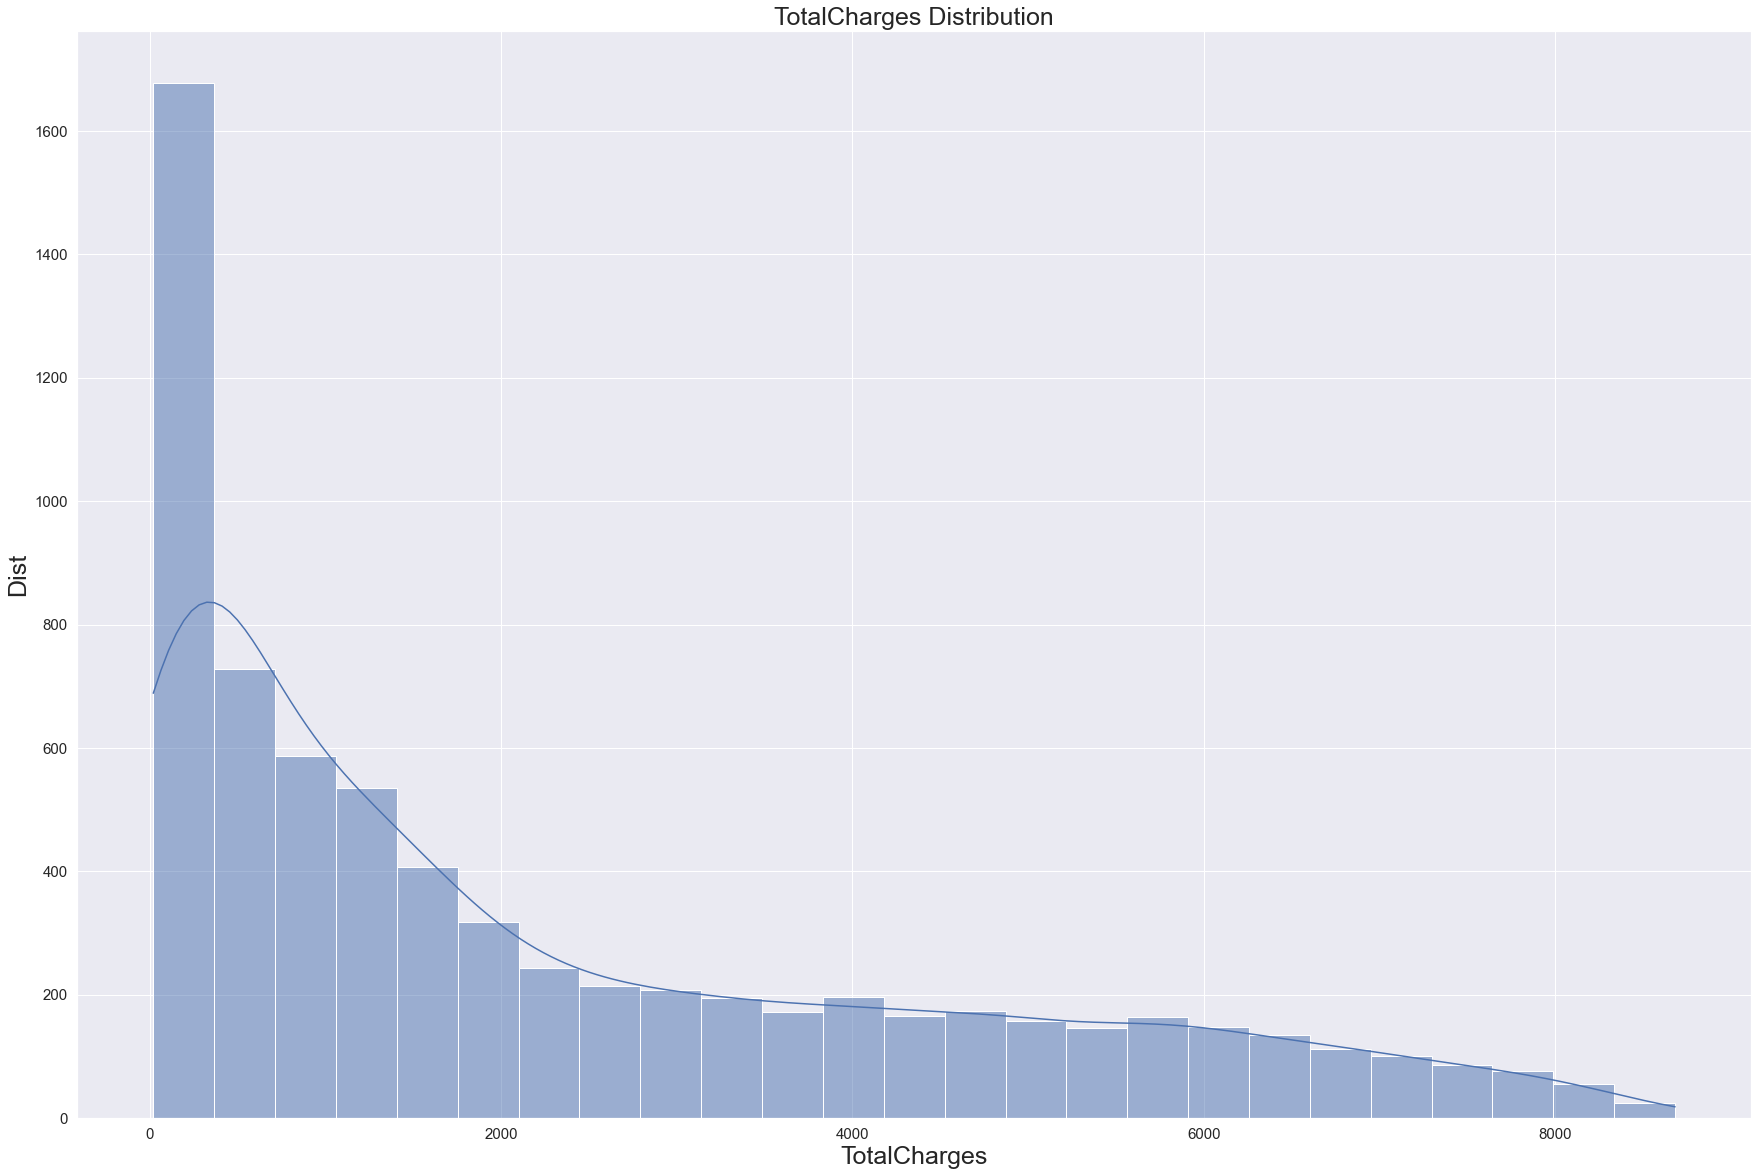

In [199]:
# let's see the distribution of these values
sns.histplot(data['TotalCharges'], kde=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('TotalCharges', fontsize=25)
plt.ylabel( 'Dist',fontsize=25)
plt.title('TotalCharges Distribution', fontsize=25)
plt.rcParams["figure.figsize"] = (30,20)

# From the above results of mean and median and also the histogram, it's quite evident the distribution doesn't follow Normal Distribution.
# Therefore We can't fill the missing values with mean or median
# let's drop these entries.

In [200]:
# dropping the missing values
data = data.dropna()
print(data.shape)
data_cleaned = data.copy() # saving a copy of cleaned dataset

(7032, 21)


In [201]:
data.shape

(7032, 21)

In [202]:
data_cleaned

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

In [224]:
# # also one more important data manipulation, let's convert Yes/No olumns to 1/0 for ease of further analysis(especially to get percentages)
# #let's Label encode 
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
label_columns = ['Churn','PhoneService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','gender','Partner','Dependents']
for label in label_columns:
    new_column_name = f"{label}_Labeled"
    data_cleaned[new_column_name] = lab_enc.fit_transform(data_cleaned[label])
data_cleaned.head()



customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... Churn_Labeled  \
0  No phone service             DSL             No  ...             0   
1                No             DSL            Yes  ...             0   
2                No             DSL            Yes  ...             1   
3  No phone service             DSL            Yes  ...             0   
4                No     Fiber optic             No  ...             1   

  PhoneService_Labeled OnlineSecurity_Labeled TechSupport_Labeled  \
0                    0                      0                   0   
1                    1                      2                   0   
2                    1                      2                   0   
3                    0                      2                   2   
4                    1                      0                   0   

  StreamingTV_Labeled StreamingMovies_Labeled PaperlessBilling_Labeled  \
0                   0                       0                        1   
1                   0                       0                        0   
2                   0                       0                        1   
3                   0                       0                        0   
4                   0                       0                        1   

  gender_Labeled  Partner_Labeled  Dependents_Labeled  
0              0                1                   0  
1              1                0                   0  
2              1                0                   0  
3              1                0                   0  
4              0                0                   0  

[5 rows x 31 columns]

# D. Exploring the data (EDA)

# Checking for imbalance in data distribution for target feature

# We are trying to predict if the customer has churned from the service provider in the previous month, the answer to which is Yes/No, therefore this is a binary clasiification problem. Let's look at the value counts in the two classes

In [225]:
# class distribution
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

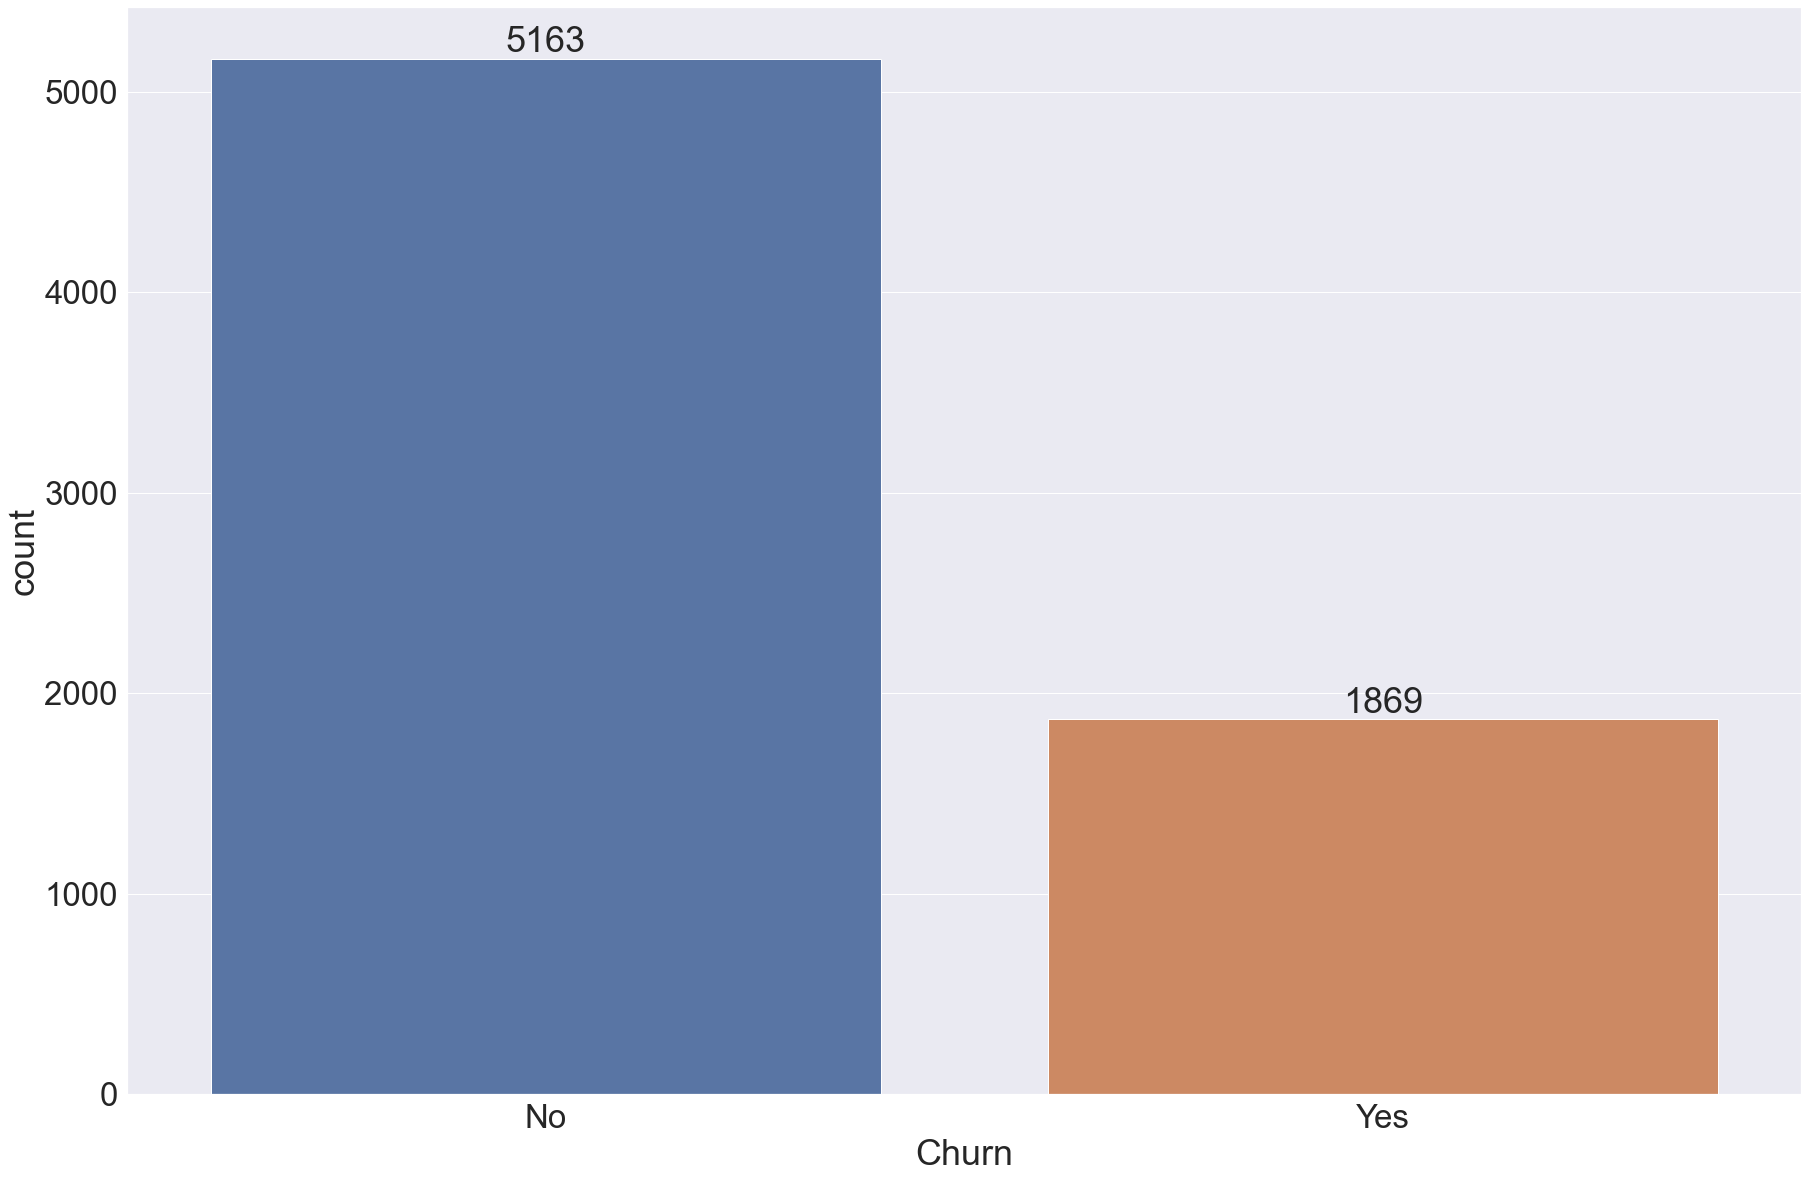

In [226]:
sns.set(font_scale = 3)
fig_churn_count = sns.countplot(x="Churn",data=data)
fig_churn_count.bar_label(fig_churn_count.containers[0])
plt.show()

In [227]:
# Let's look at the percentage of each class
data_churn = data['Churn'].value_counts()/len(data.Churn)*100
print(data_churn)

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


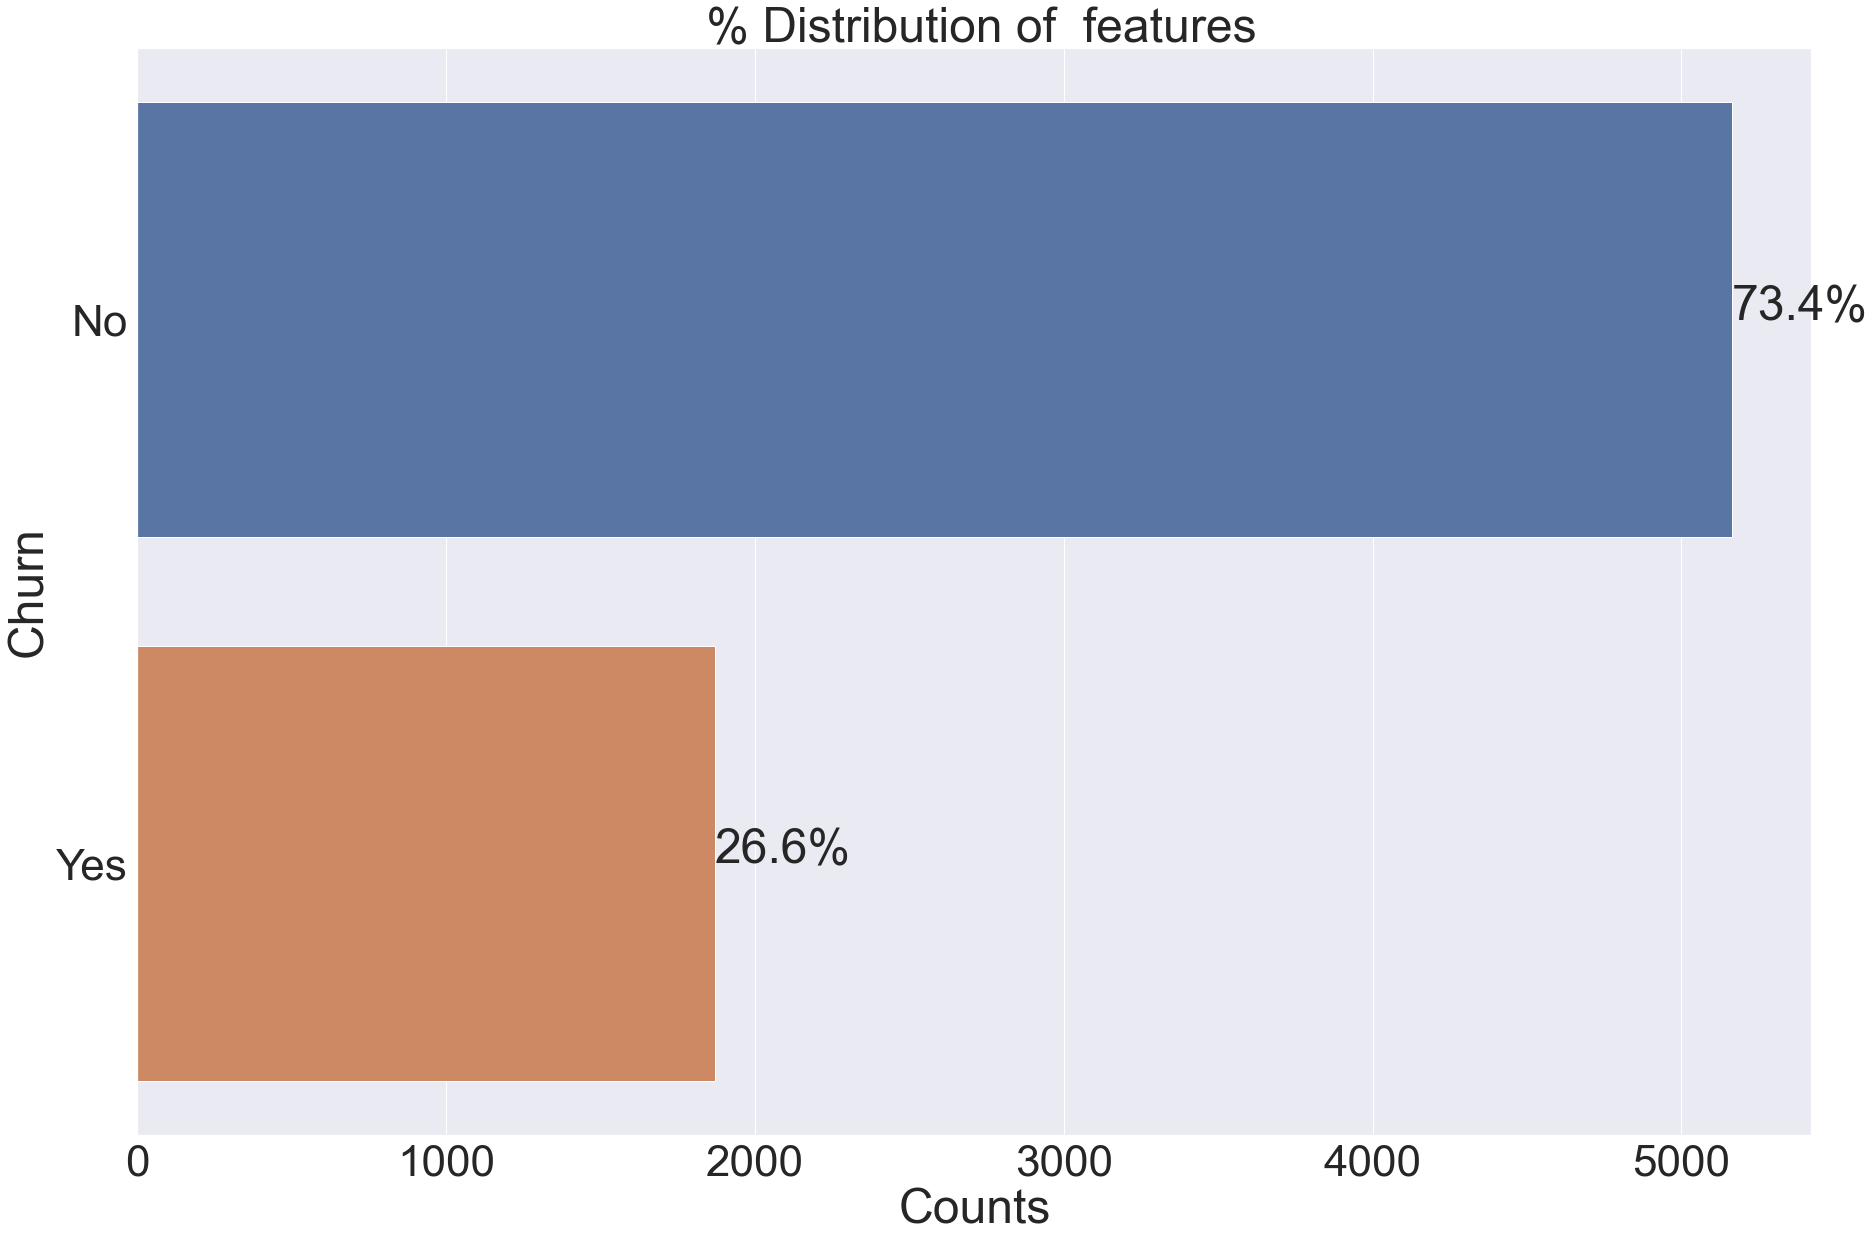

In [228]:
def bar_plot(data,column): 
    sns.set(font_scale=4)
    ax = sns.countplot(y=column, data=data)
    plt.title(' % Distribution of  features')
    plt.xlabel('Counts')

    total = len(data[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02 # x annotation
        y = p.get_y() + p.get_height()/2 # y annotation
        ax.annotate(percentage, (x, y))
    plt.show()
bar_plot(data, 'Churn')

# From the above observations it is clear that the distribution of class is imbalanced!!

# Now let's explore the effect of numerical features on Customer Churn

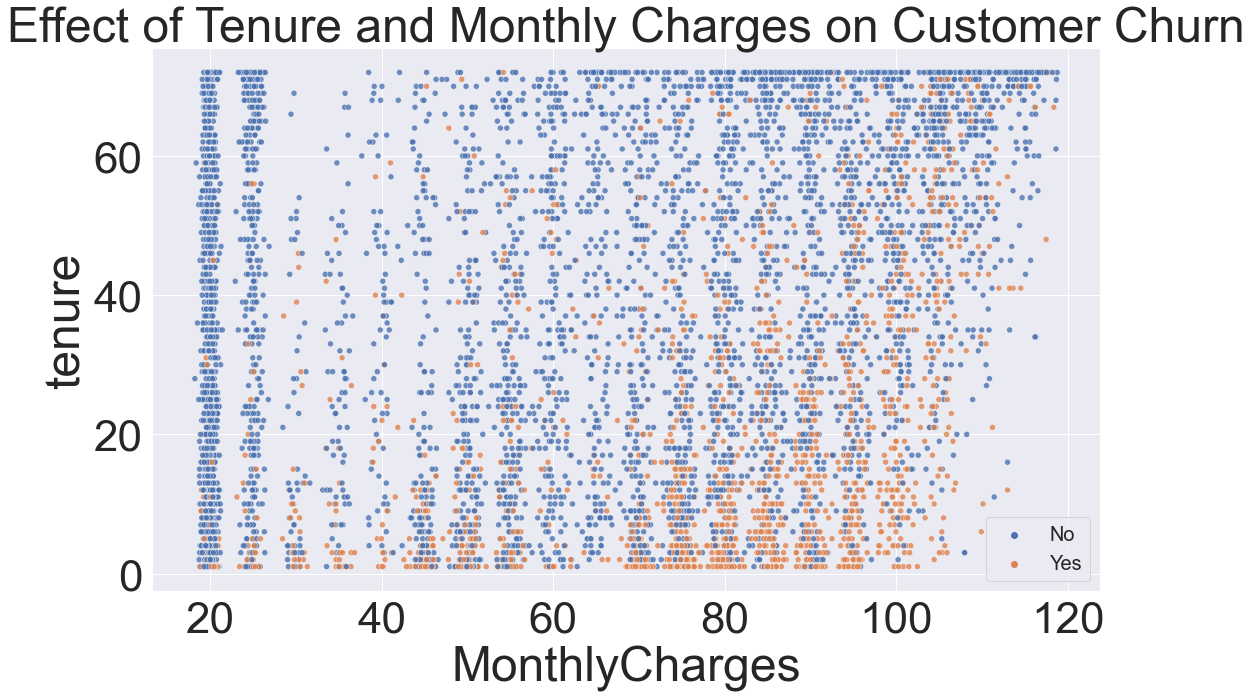

In [229]:
# Effect of Tenure and Total Charges 
fig, ax = plt.subplots(figsize=(17, 10))
fig_churn_tenure_monthlycharges = sns.scatterplot(x="MonthlyCharges",y="tenure",hue="Churn",alpha=0.8,data=data)
fig_churn_tenure_monthlycharges.set_title("Effect of Tenure and Monthly Charges on Customer Churn")
plt.legend(fontsize=20)
plt.show()

# Observations: <br>
   # 1. It is clearly seen that customers with higher monthly charges are more likely to churn.<br>
  #  2. Customers with lower tenure are more likely to churn.<br>
   # 3. Customers with lower tenure and higher Monthly Charges are the most likely ones to churn.<br>
  #  4. We need to keep these two features in our model building as they seem to affect the probability of churn.<br>

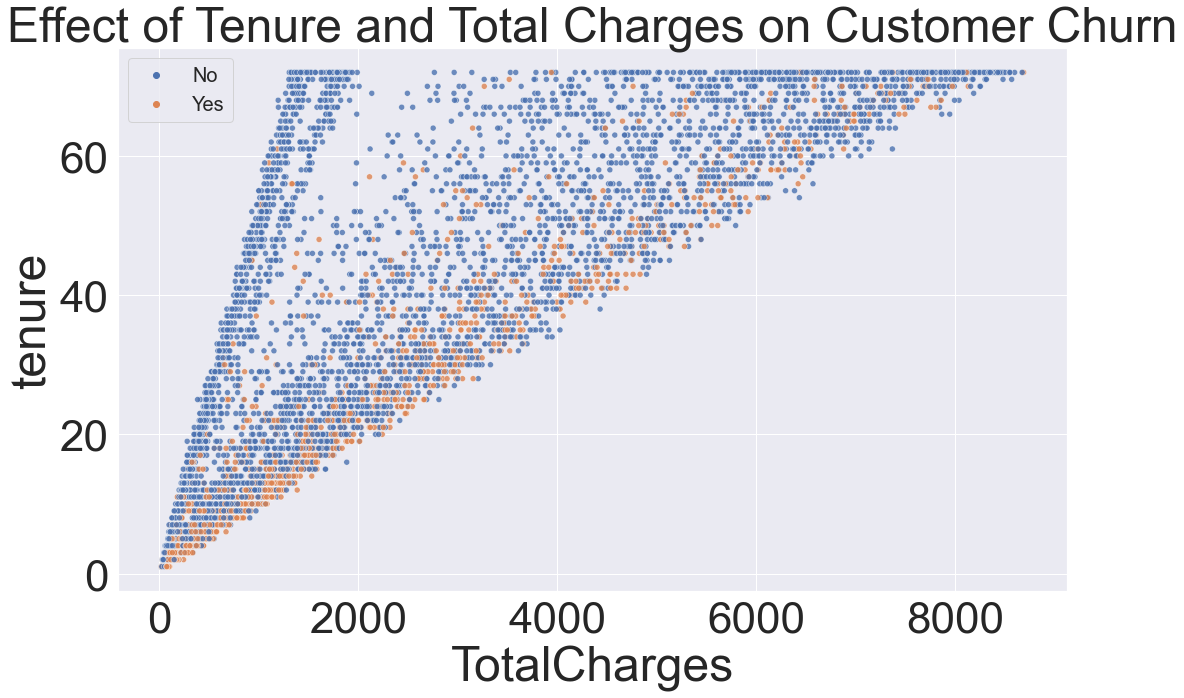

In [230]:
# Effect of Tenure and Total Charges onCustomer Churn.
fig, ax = plt.subplots(figsize=(17, 10))
fig_churn_tenure_monthlycharges = sns.scatterplot(x="TotalCharges",y="tenure",hue="Churn",alpha=0.8,data=data)
fig_churn_tenure_monthlycharges.set_title("Effect of Tenure and Total Charges on Customer Churn")
plt.legend(fontsize=20)
plt.show()

# Observations:<br>
   # 1. It looks like we have two groups here, one on left, then one on extreme right, after asmall gap inbetween.<br>
   # 2. As the Total charges are low, the chance of customer chance is also low.<br>
   # 3. As the total charges are high, the chance of customer churn is also high.<br>
   # 4. Also we again see that the Churn customers are most likely the recently joined ones<br>
   # 5. The recently joined customers with higher Total charges are the ones at high risk of Churning.<br>
    

# Now let's explore the effect of Categorical features on Customer churn.

This dataset has 16 categorical features:

 - Six binary features (Yes/No)<br>
 - Nine features with three unique values each (categories)<br>
 - One feature with four unique values<br>

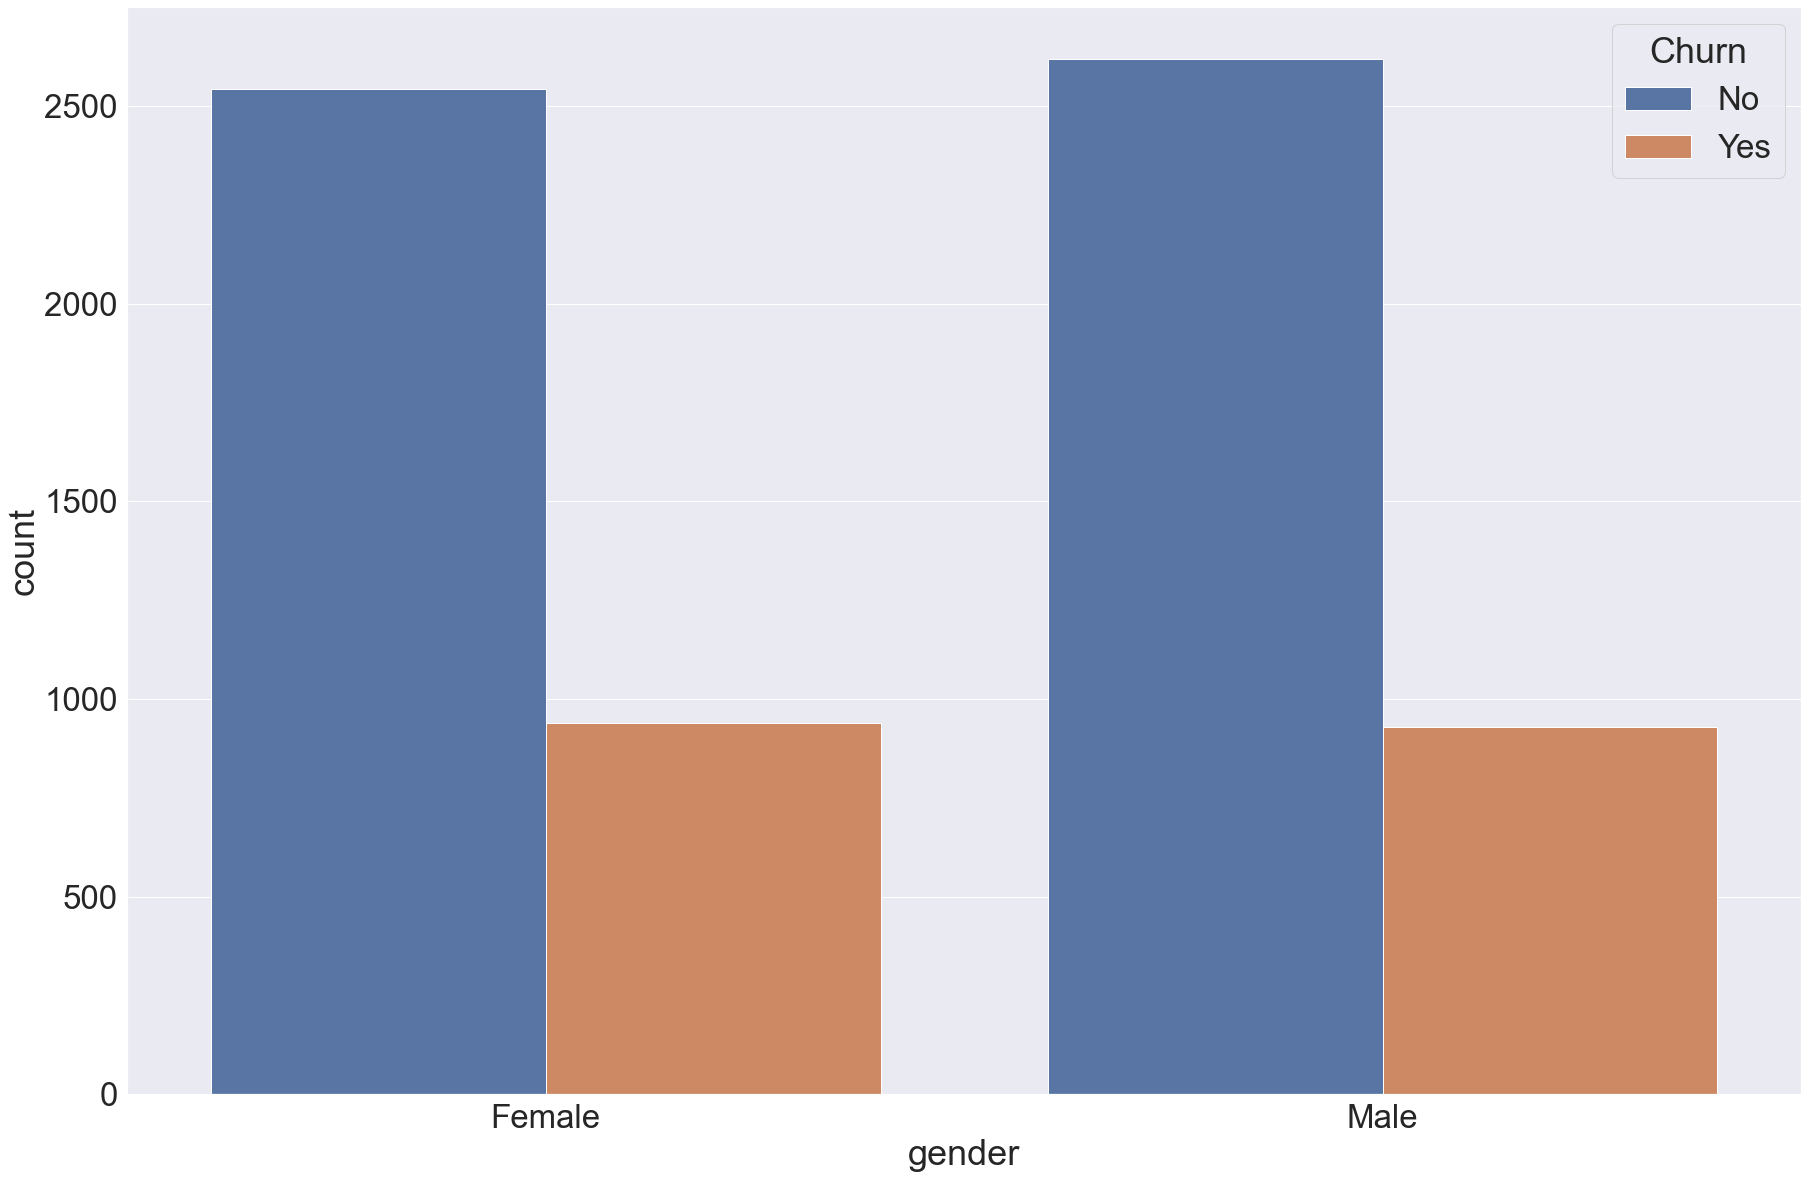

In [231]:
# 1. Gender - Do particular gender churn more?
sns.set(font_scale=3)
sns.countplot(x='gender', data=data, hue='Churn')
plt.show()

**Observation**: Gender doesn't seem to affect Customer Churn. We can consider neglecting this feature in our model

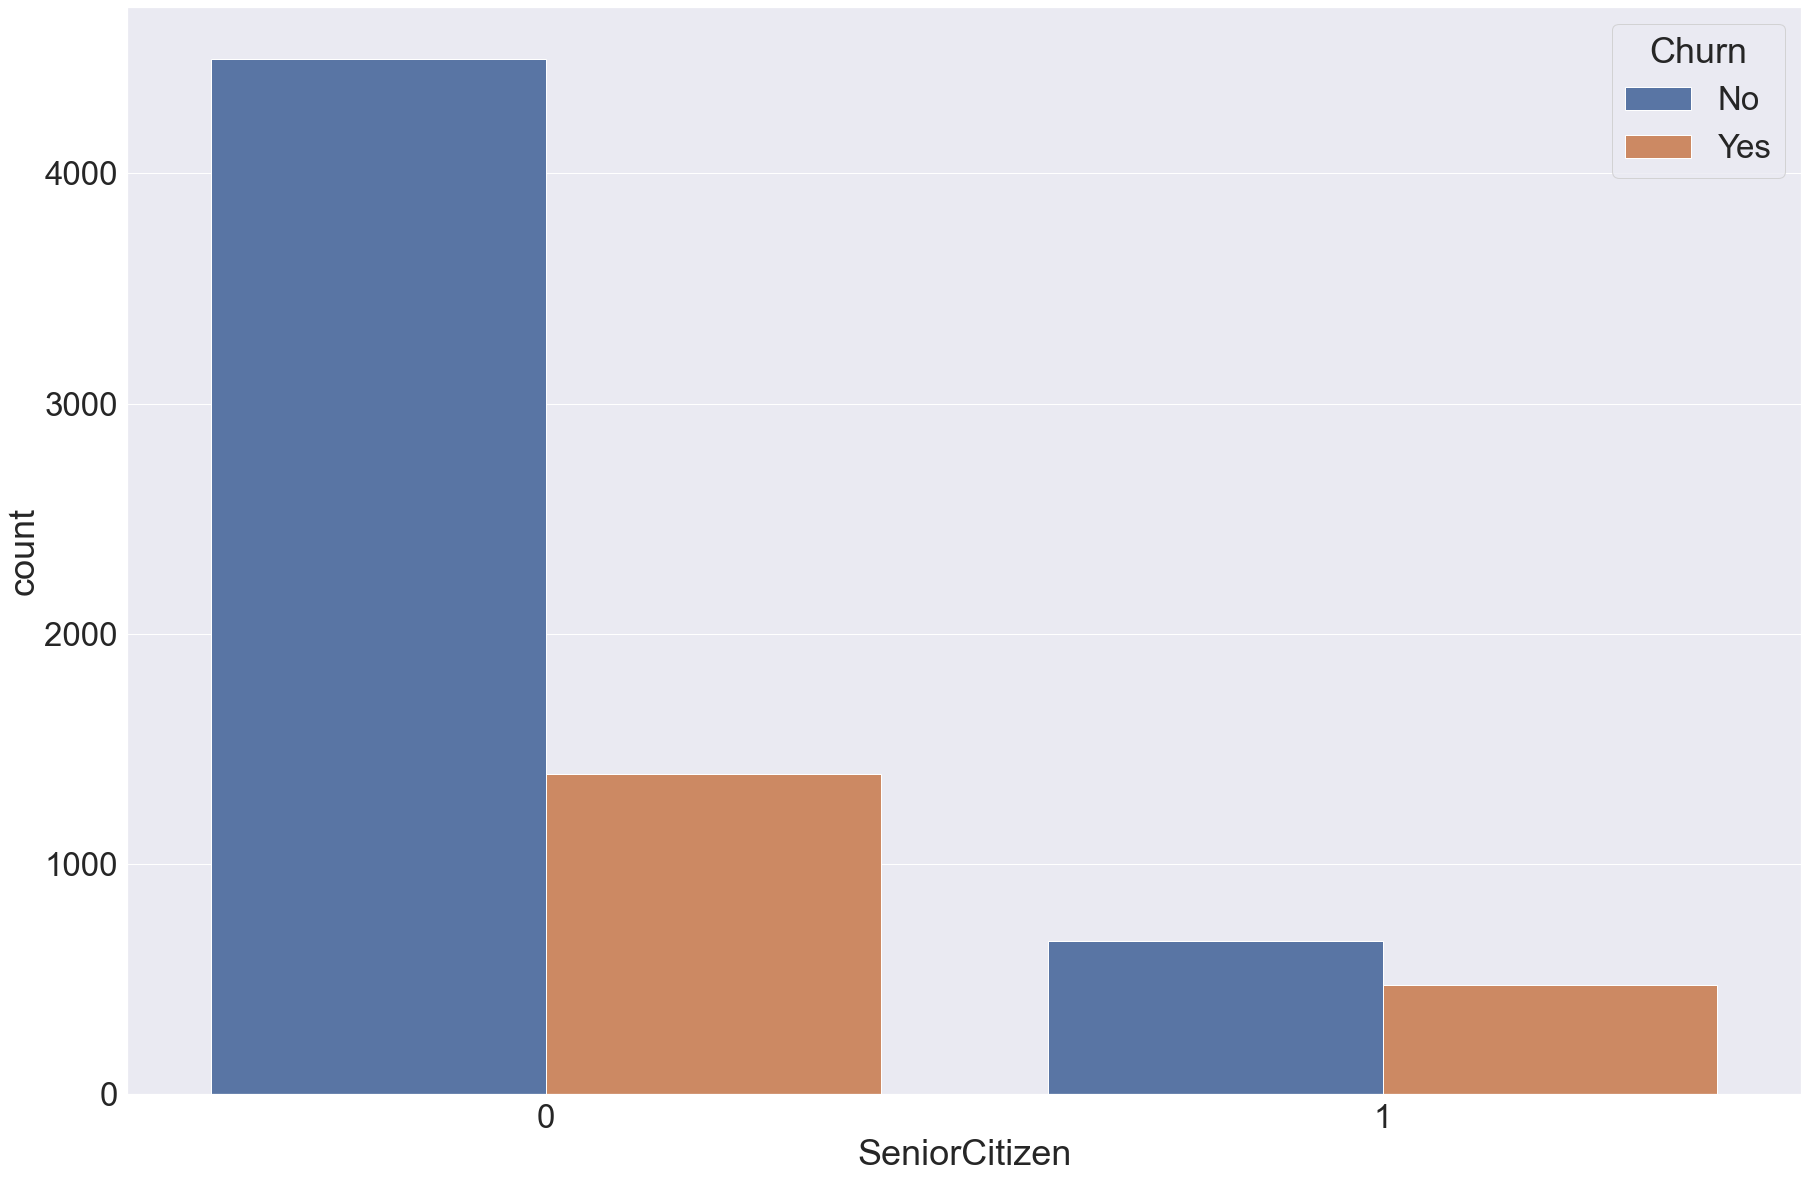

In [232]:
# 2. Senior citizens
sns.set(font_scale = 3)
sns.countplot(x='SeniorCitizen', data=data, hue='Churn')
plt.show()

In [233]:
# from the above plot it is very difficult to draw a comclusion. let's do a plot showing percentage.
total_customers = data_cleaned['customerID'].count()
data_cleaned["ones"] = 1
grouped_senior = data_cleaned.groupby("SeniorCitizen")["ones","Churn_Labeled"].sum().reset_index()
grouped_senior.rename(columns={"ones" : "total_customers","Churn_Labeled" : "churn_customers"},inplace=True)
grouped_senior["percentage_of_churns"] = (grouped_senior["churn_customers"] / grouped_senior["total_customers"]) * 100
grouped_senior["percentage_of_not_churns"] = 100 - grouped_senior["percentage_of_churns"]
grouped_senior.head()

SeniorCitizen  total_customers  churn_customers  percentage_of_churns  \
0              0             5890             1393             23.650255   
1              1             1142              476             41.681261   

   percentage_of_not_churns  
0                 76.349745  
1                 58.318739

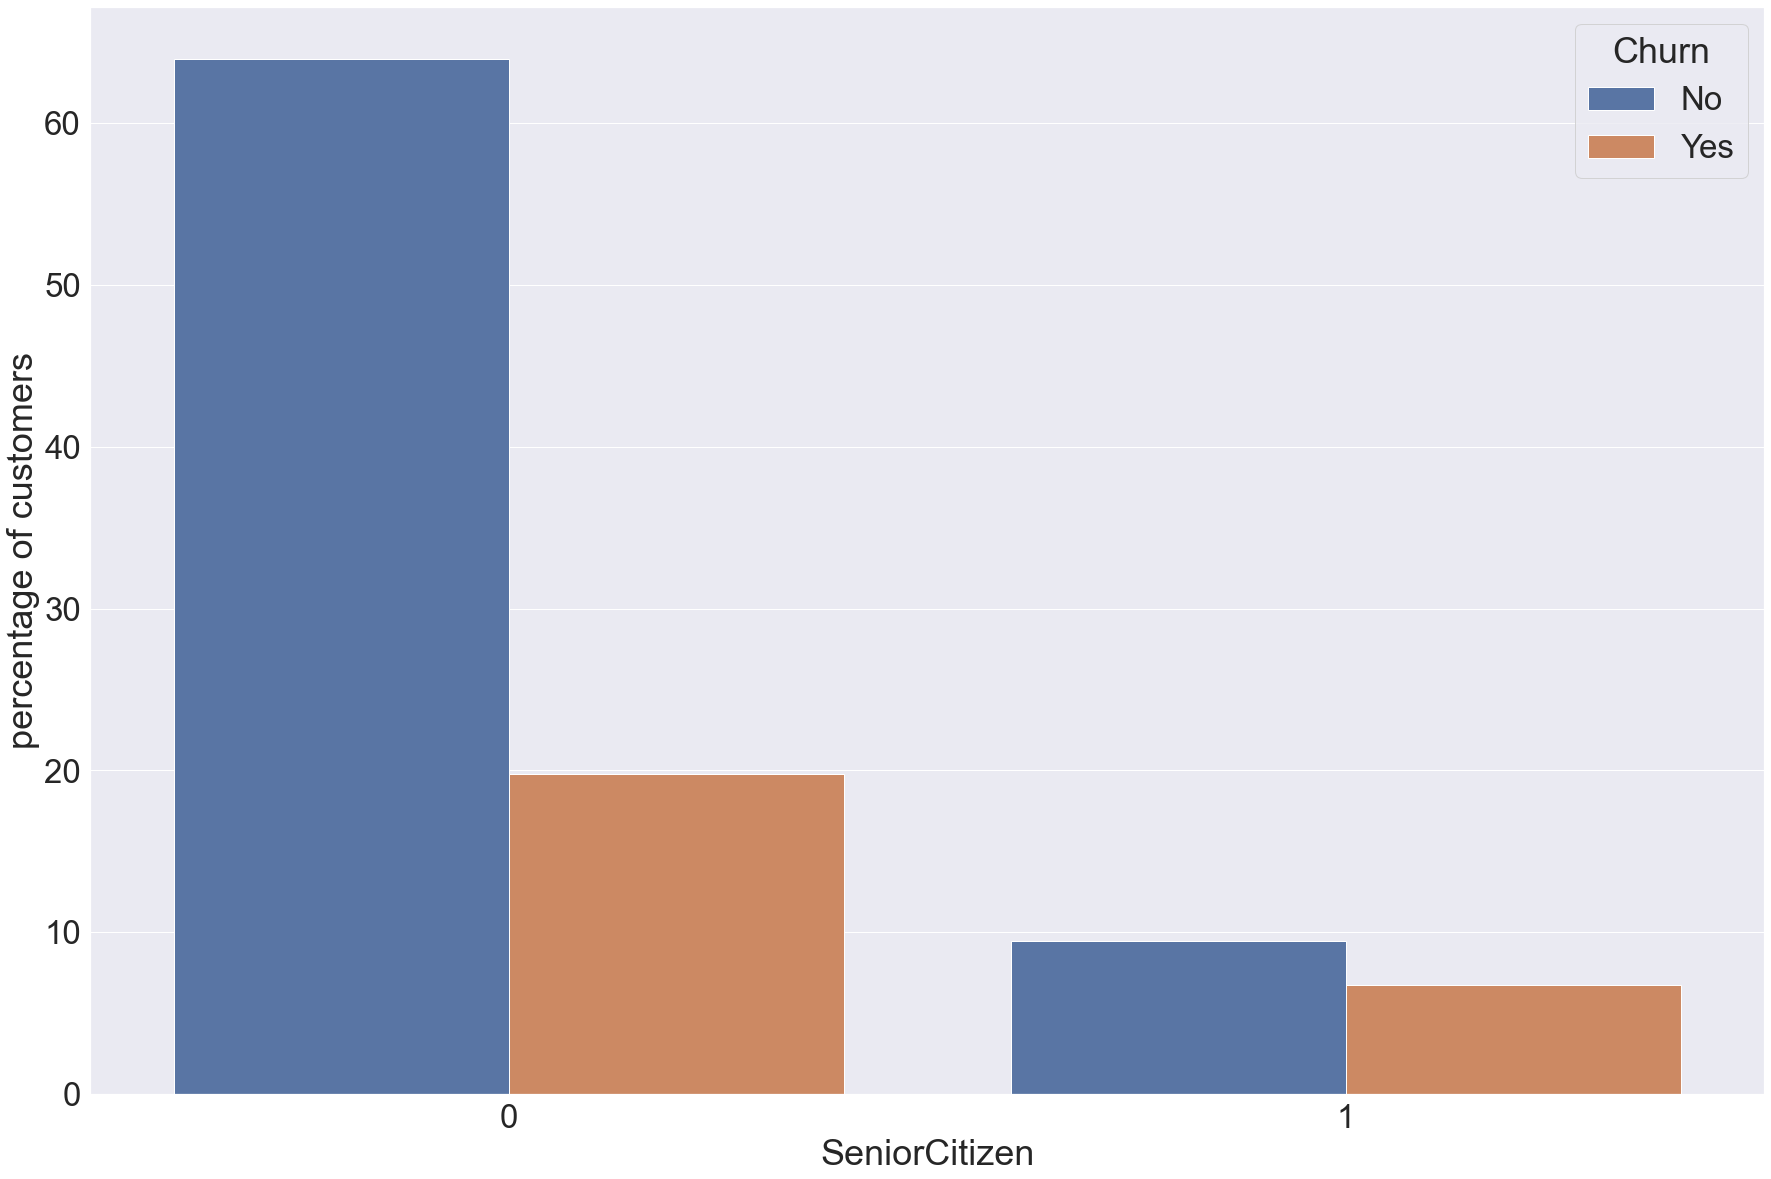

In [234]:
y_axis = 'percentage of customers'
senior_citizen = data.groupby('SeniorCitizen')['Churn'].value_counts()/len(data)*100
senior_citizen = senior_citizen.to_frame().rename({'Churn' : y_axis}, axis=1).reset_index()
sns.barplot(x='SeniorCitizen', y=y_axis, hue='Churn', data=senior_citizen)
plt.show()

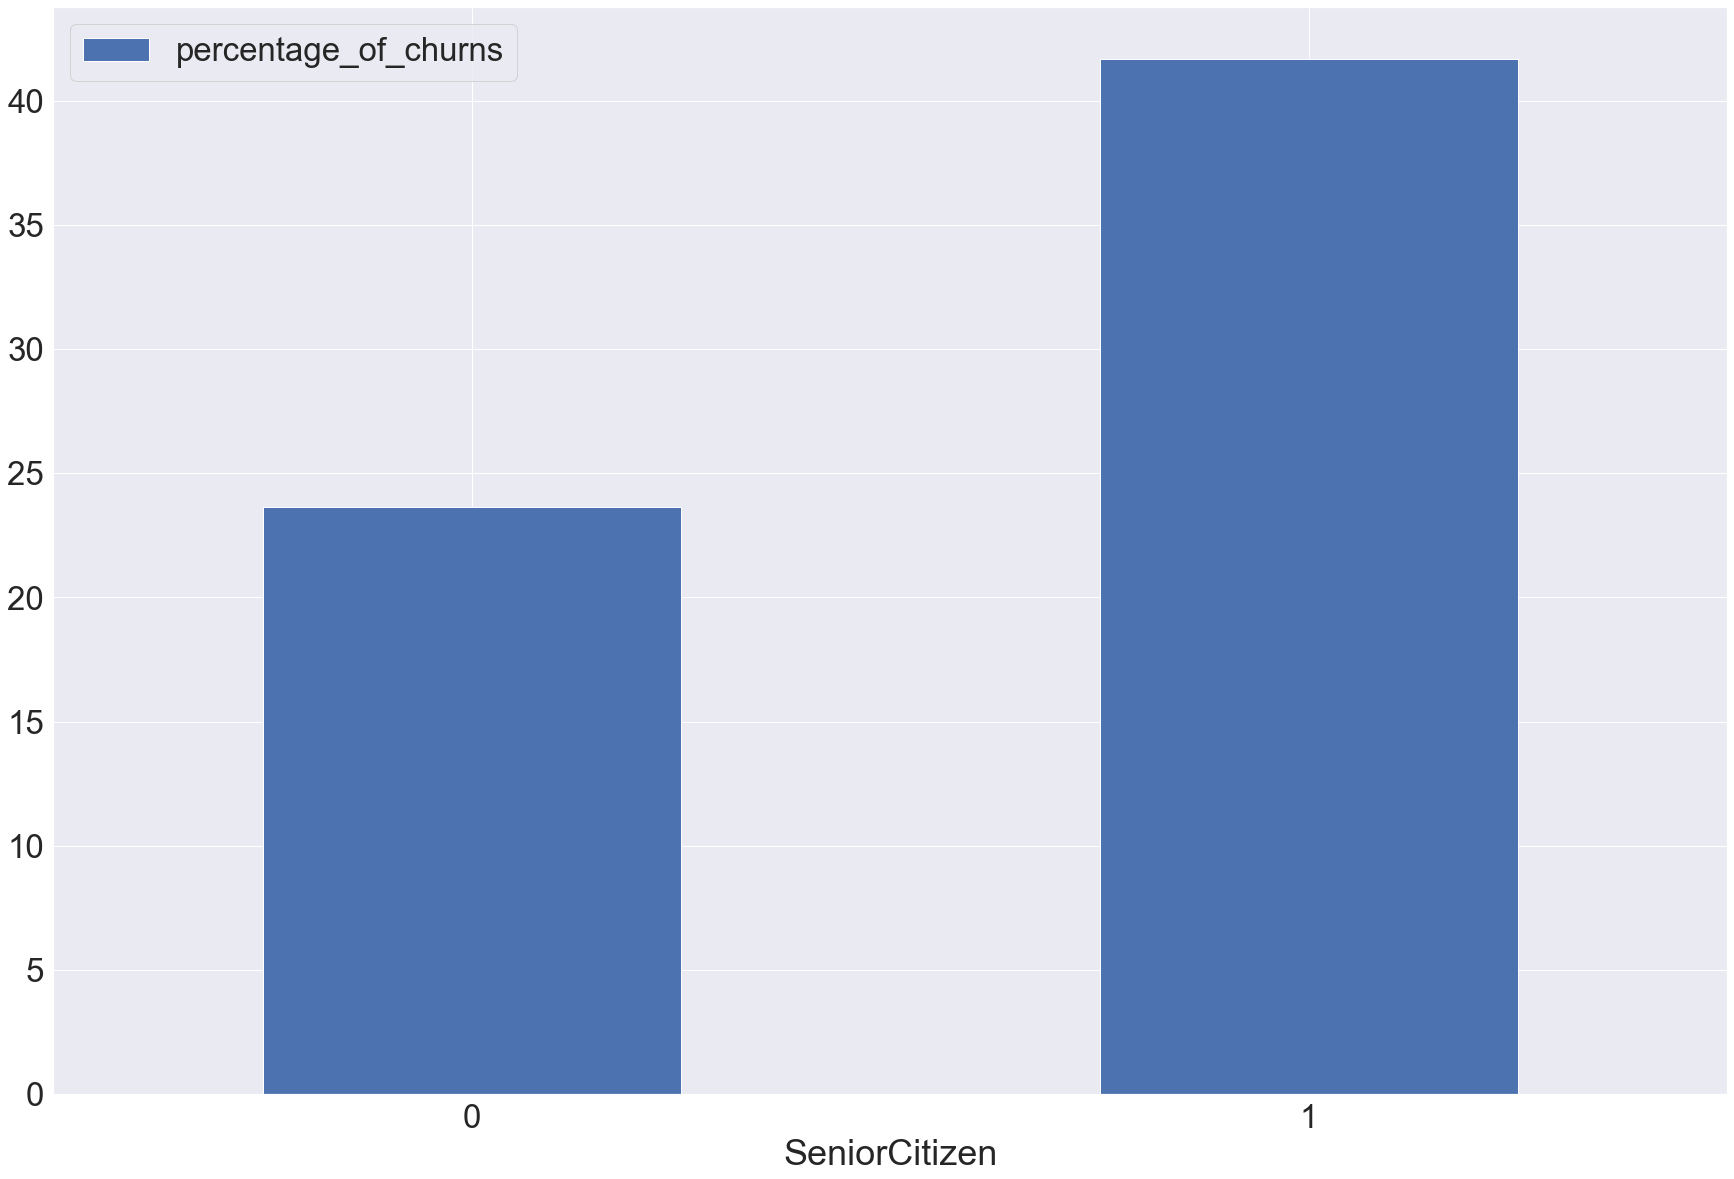

In [235]:
# fig_churn_age = px.histogram(grouped_senior,x="SeniorCitizen",color="percentage_of_churns",title="Age vs Churn")
# fig_churn_age.show()
ax = grouped_senior.plot.bar(x='SeniorCitizen', y='percentage_of_churns', rot=0)



# Observation: From the above plot it is clear that Senior Citizens are more likely to Churn than younger customers!<br>
# It is also evident from the first graph that most of the customers belong to younger generation.

# 3. Whether having a partner will affect Customer Churn?

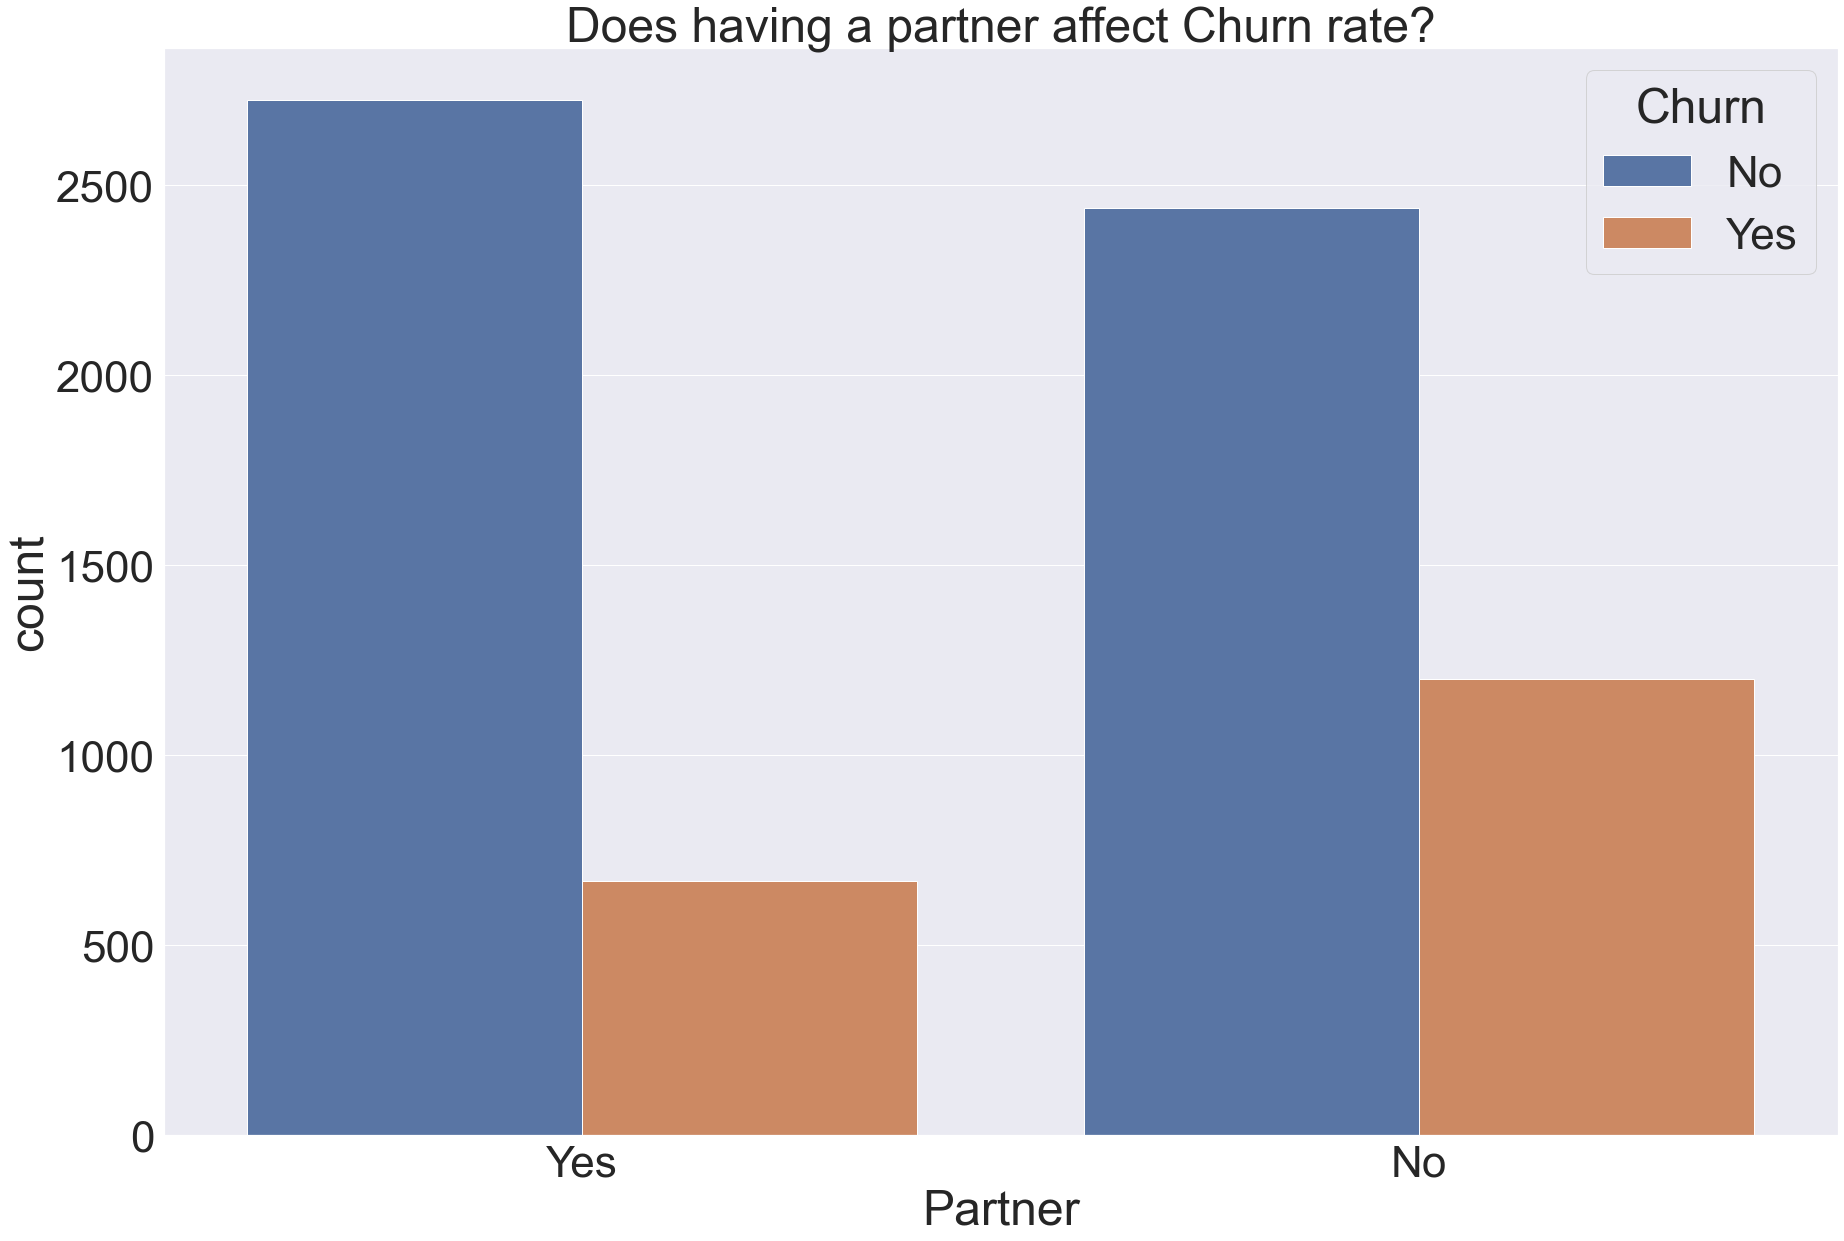

In [236]:
sns.set(font_scale=4)
sns.countplot(x='Partner', hue='Churn', data=data)
plt.title('Does having a partner affect Churn rate?')
plt.show()

# Observation: It's quite interesting to see that unmarried/having no partner customers are more likely to churn than those who are married!!<br>
# This feature would definitely go into our model

# 4. Dependants vs Churn

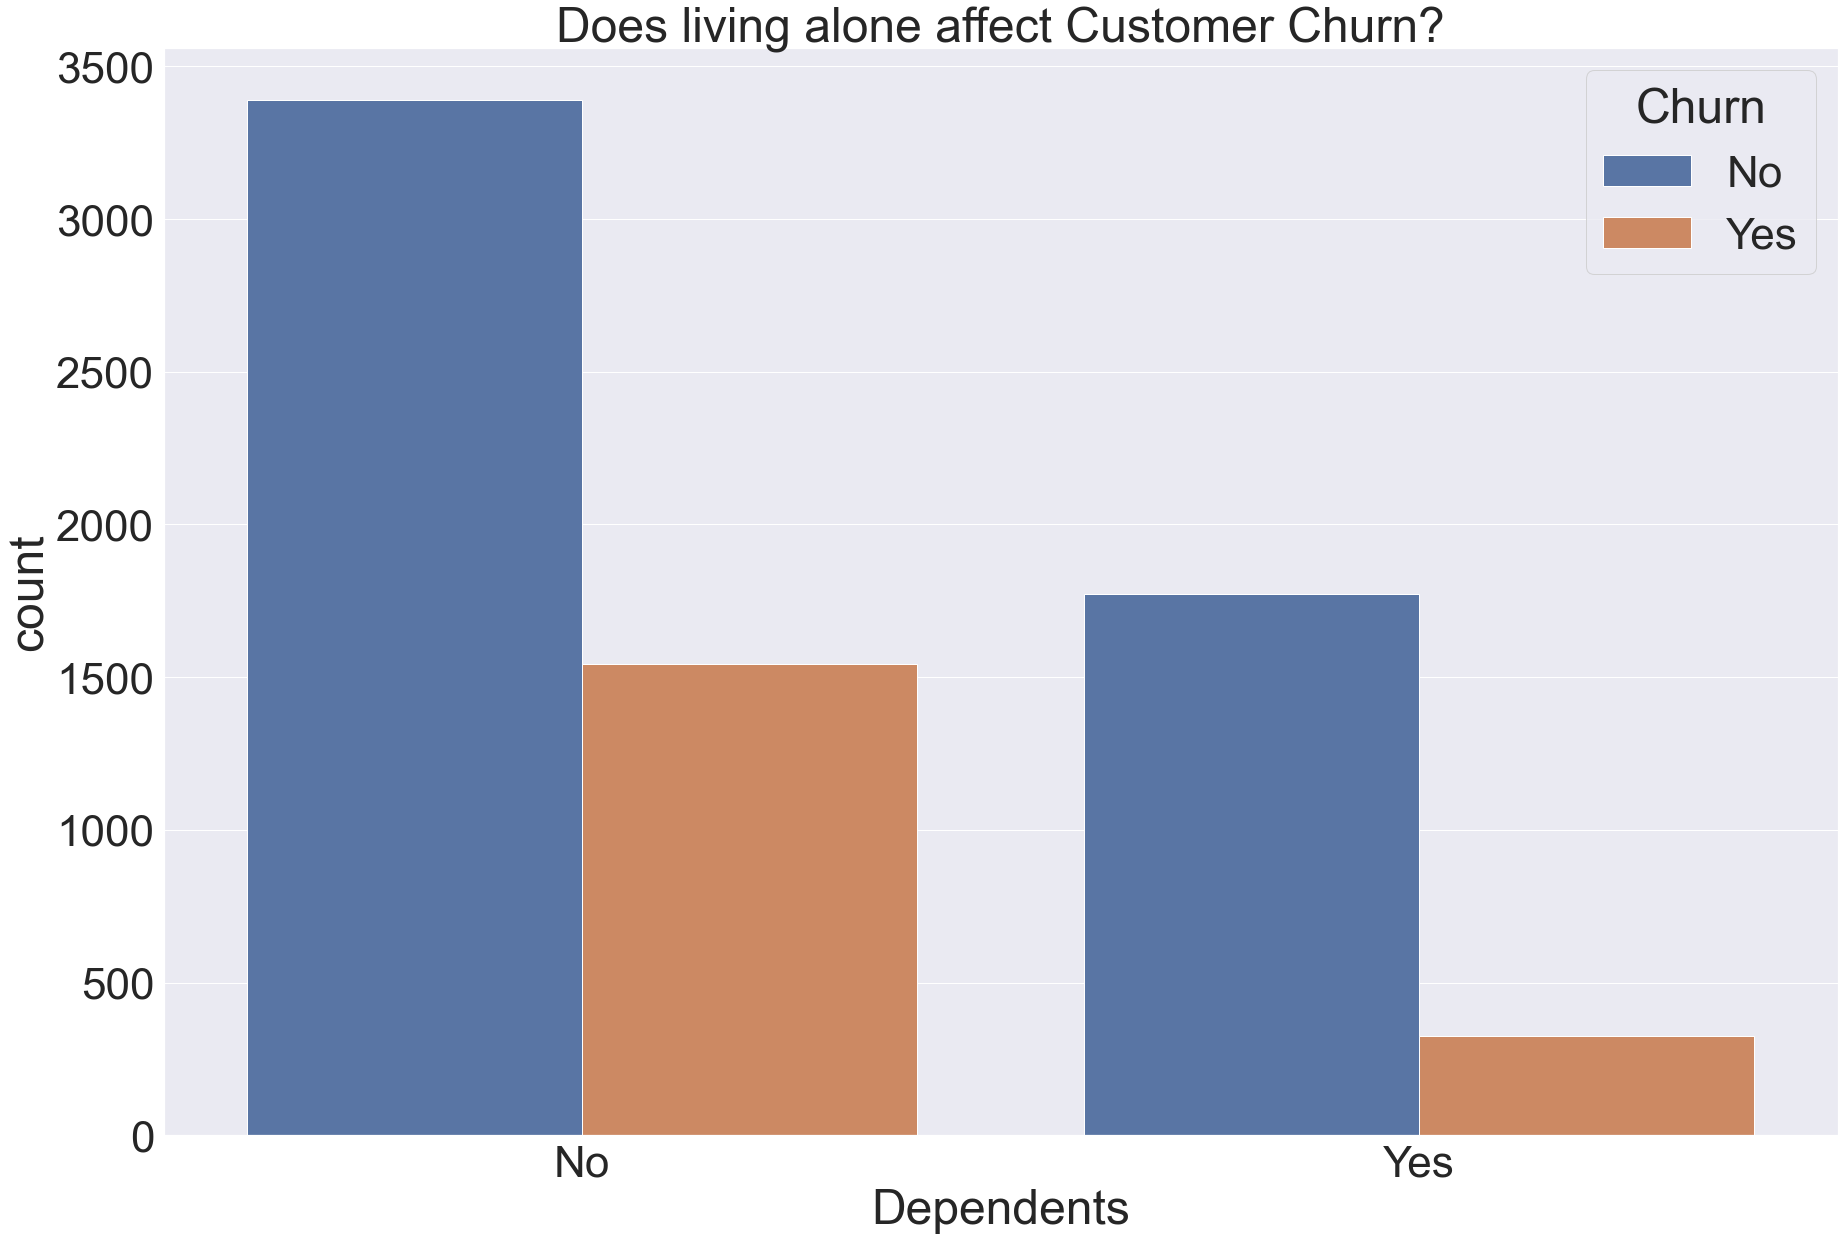

In [237]:
sns.set(font_scale=4)
sns.countplot(x='Dependents', hue='Churn', data=data).set_title('Does living alone affect Customer Churn?')
plt.show()

# Observation: It seems like those living alone are more likely to Churn!
   # Also this feature might be having a correlation between Partner feature

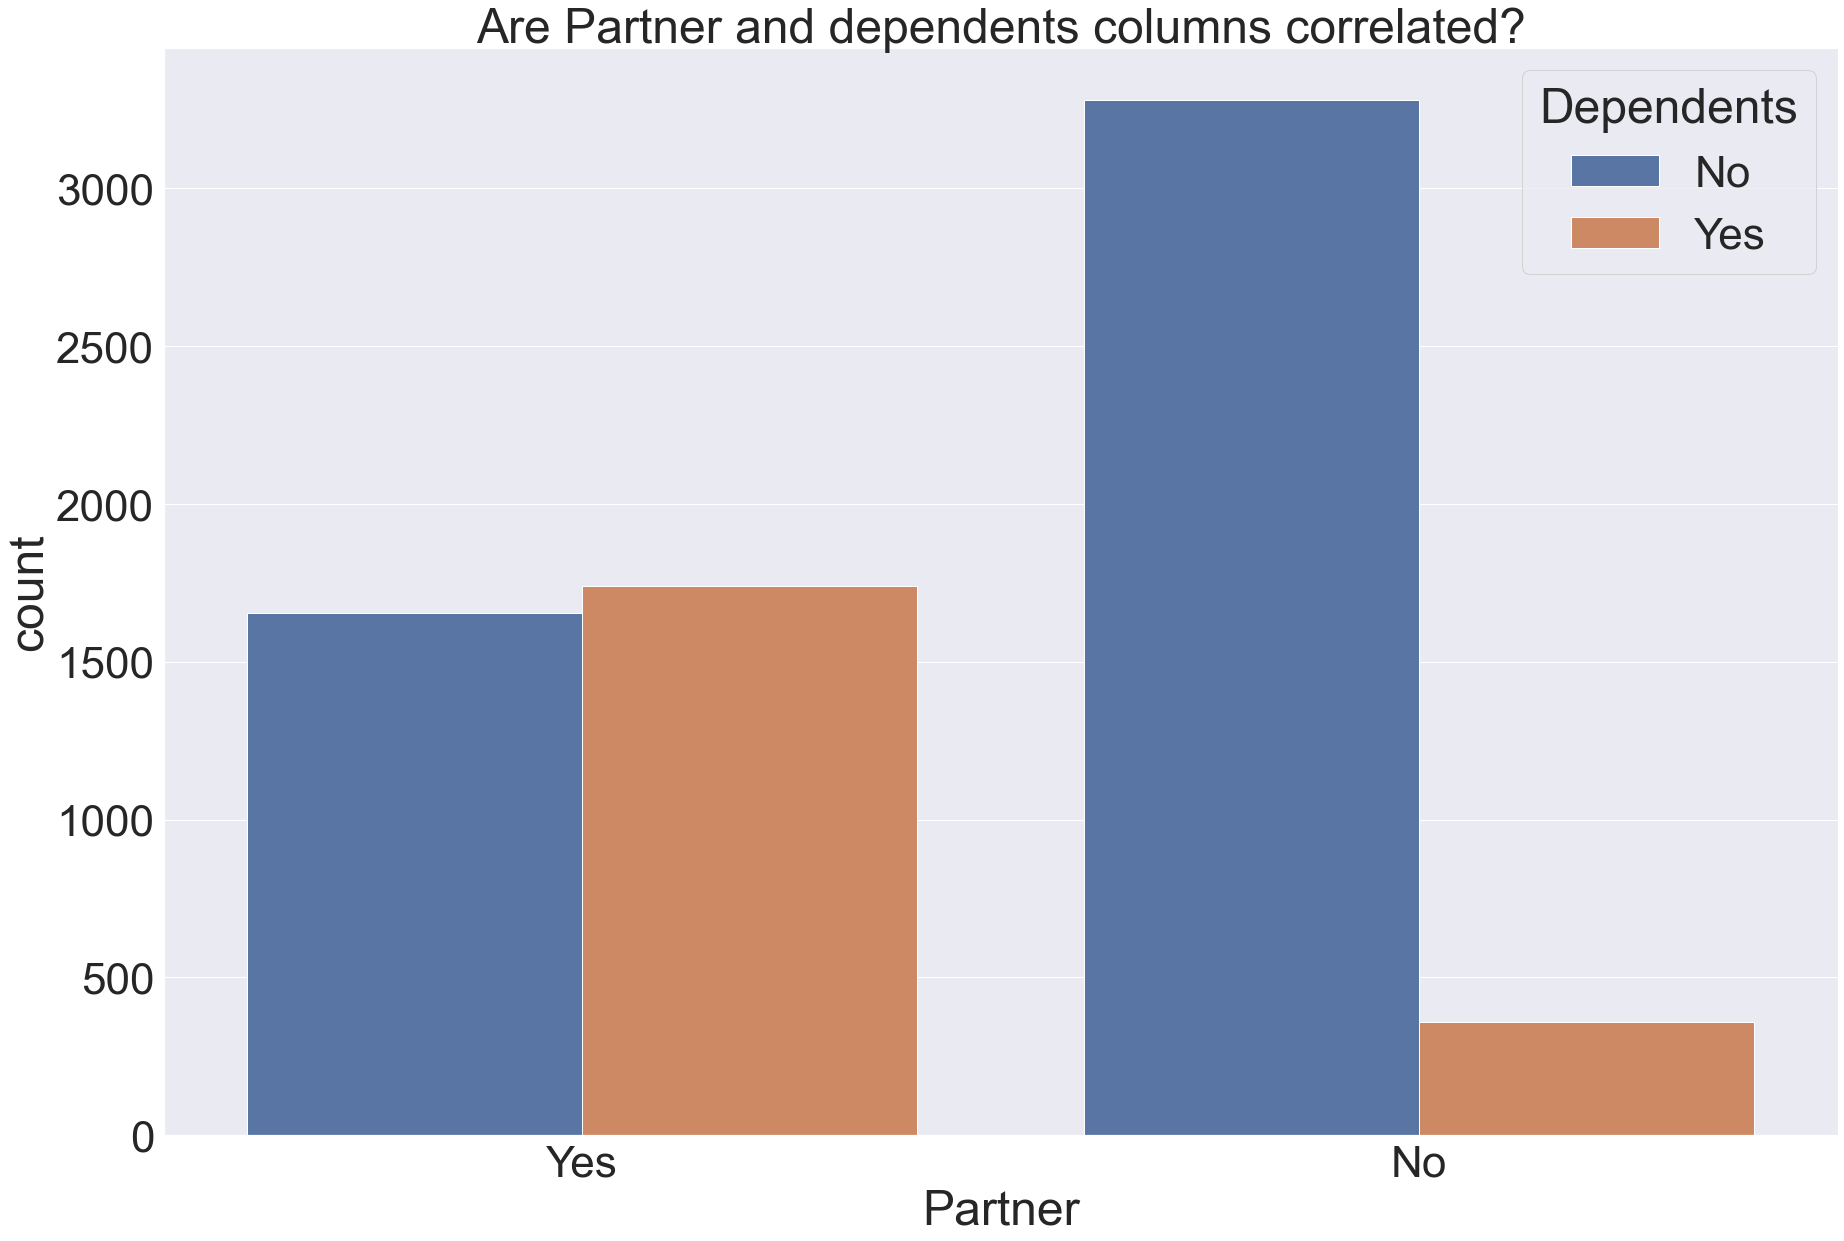

In [238]:
# let's explore if there is a correlation between dependants and partners.
sns.set(font_scale=4)
sns.countplot(x='Partner', hue='Dependents', data=data).set_title('Are Partner and dependents columns correlated?')
plt.show()

# from the above graph it's clear that these two featuures are indeed correlated.

# 5. PhoneService vs churn

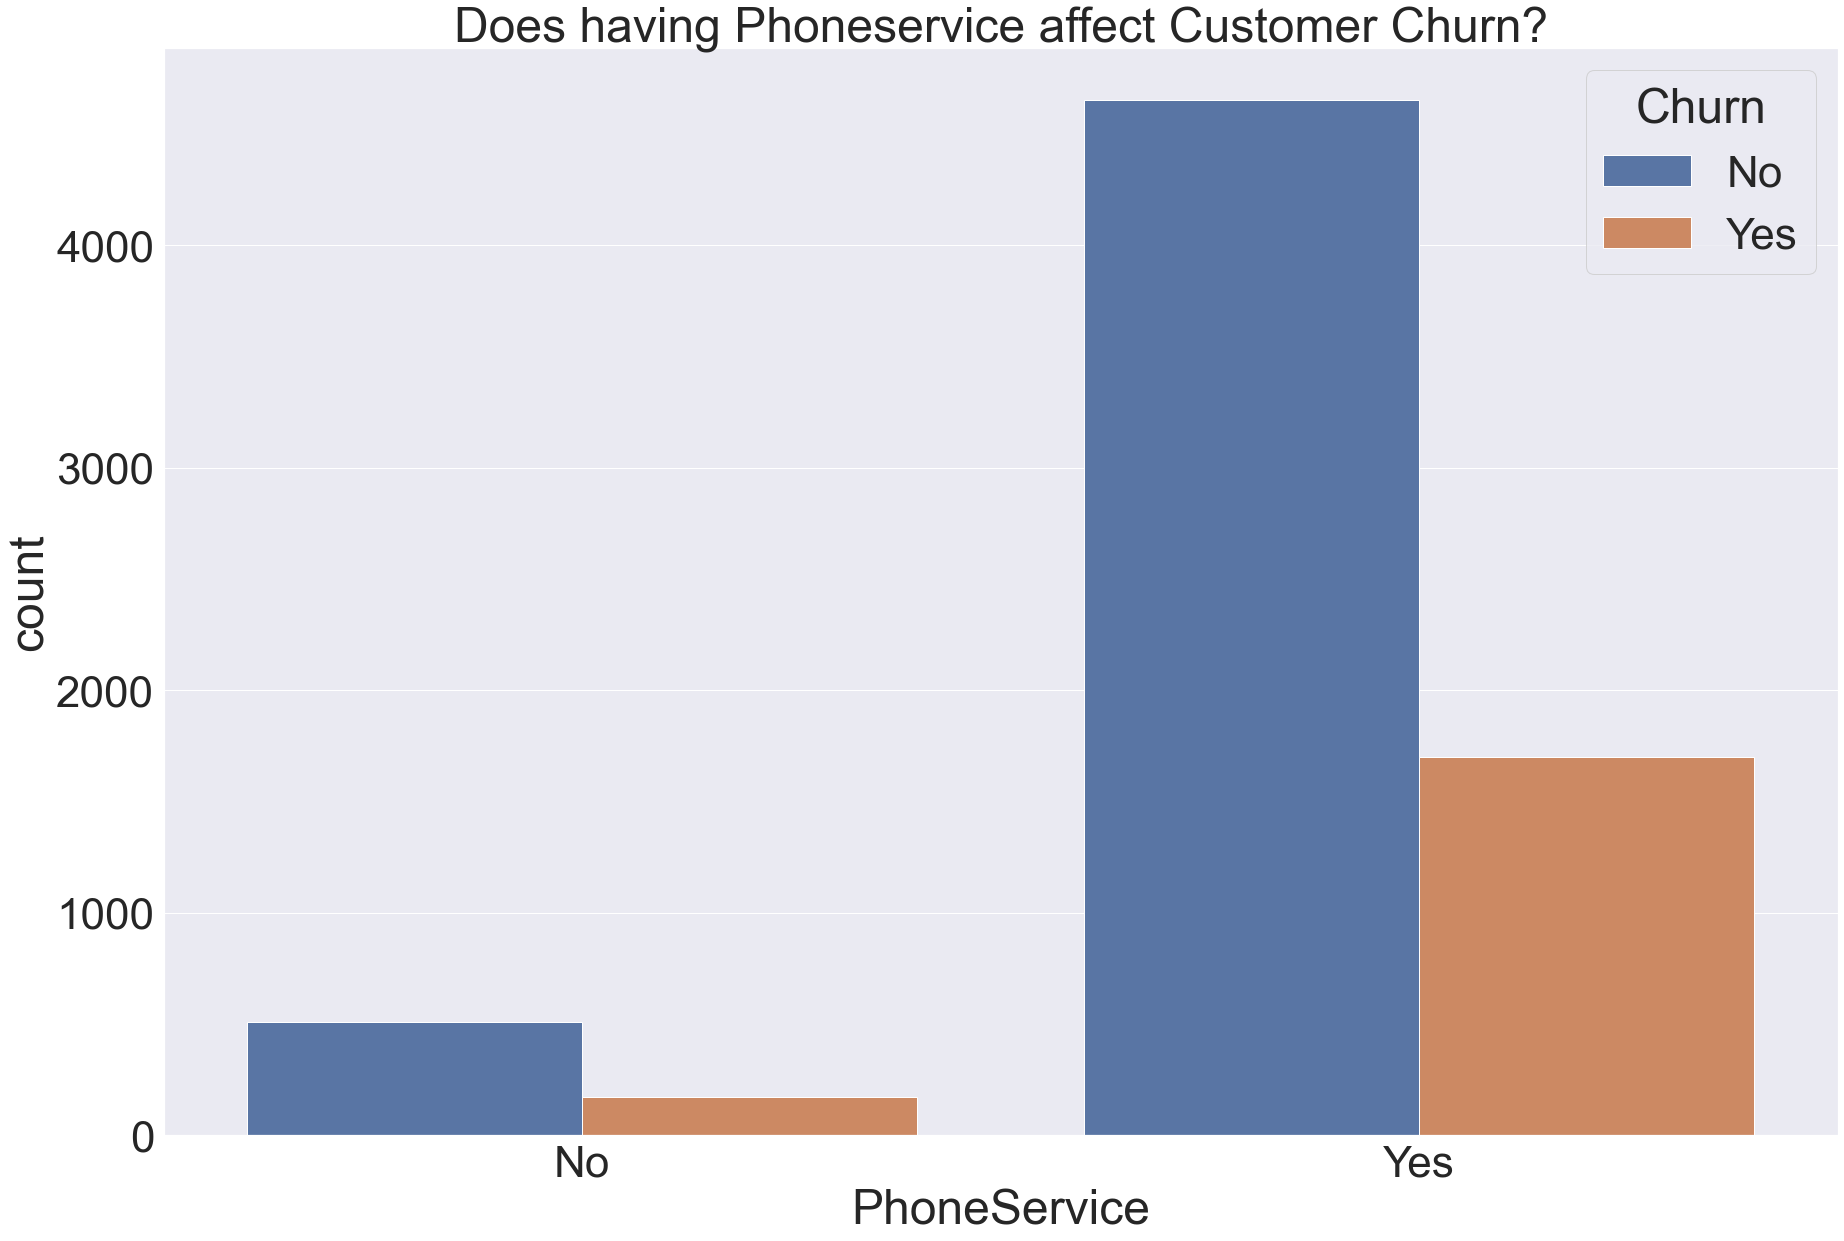

In [239]:
sns.set(font_scale=4)
sns.countplot(x='PhoneService', hue='Churn', data=data).set_title('Does having Phoneservice affect Customer Churn?')
plt.show()

# From the above plot it looks like, those customers having a phoneservice are more likely to churn, but to be absolutely sure, we need to convert this into percentages.


In [240]:
total_customers = data_cleaned['customerID'].count()
data['ones'] = 1
grouped_phoneservice = data_cleaned.groupby("PhoneService")['ones','Churn_Labeled'].sum().reset_index()
grouped_phoneservice.rename(columns={'ones' : 'total_customers','Churn_Labeled' : 'churn_customers'},inplace=True)
grouped_phoneservice['percentage_of_churns'] = (grouped_phoneservice['churn_customers'] / grouped_phoneservice['total_customers']) * 100
grouped_phoneservice['percentage_of_not_churns'] = 100 - grouped_senior['percentage_of_churns']
grouped_phoneservice.head()

PhoneService  total_customers  churn_customers  percentage_of_churns  \
0           No              680              170             25.000000   
1          Yes             6352             1699             26.747481   

   percentage_of_not_churns  
0                 76.349745  
1                 58.318739

In [241]:
fig_churn_phoneservice = px.bar(grouped_phoneservice,x="PhoneService",y="percentage_of_churns",title="PhoneService vs Churn")
fig_churn_phoneservice.show()

# There is only a difference of 1.7% which is almost neglible, therefore this feature can be neglected.

# 6. MultipleLines vs Churn

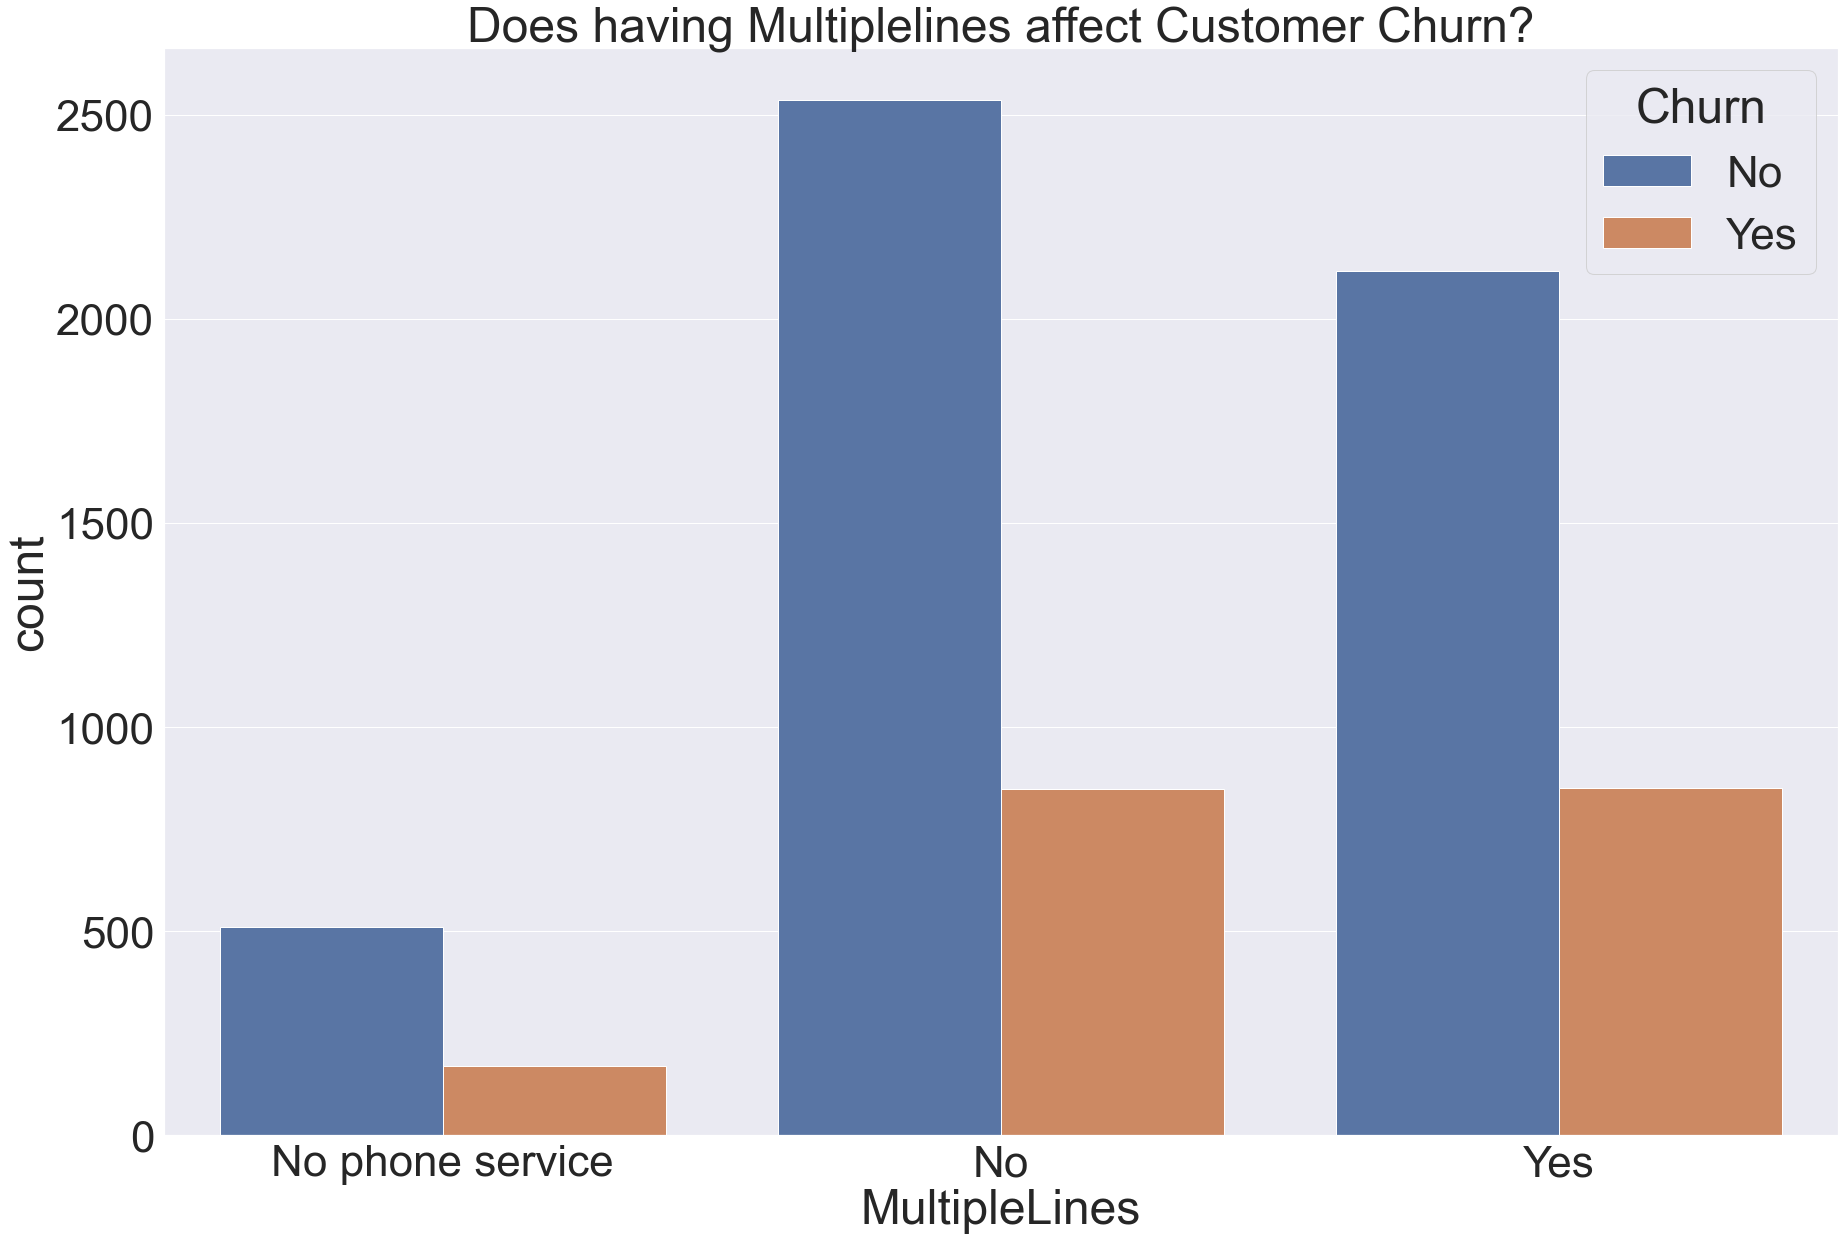

In [242]:
sns.set(font_scale=4)
sns.countplot(x='MultipleLines', hue='Churn', data=data).set_title('Does having Multiplelines affect Customer Churn?')
plt.show()

In [243]:
total_customers = data_cleaned['customerID'].count()
data_cleaned['ones'] = 1
grouped_multiplelines = data_cleaned.groupby("MultipleLines")['ones','Churn_Labeled'].sum().reset_index()
grouped_multiplelines.rename(columns={'ones' : 'total_customers','Churn_Labeled' : 'churn_customers'},inplace=True)
grouped_multiplelines['percentage_of_churns'] = (grouped_multiplelines['churn_customers'] / grouped_multiplelines['total_customers']) * 100
grouped_multiplelines['percentage_of_not_churns'] = 100 - grouped_multiplelines['percentage_of_churns']
grouped_multiplelines.head()

MultipleLines  total_customers  churn_customers  percentage_of_churns  \
0                No             3385              849             25.081241   
1  No phone service              680              170             25.000000   
2               Yes             2967              850             28.648466   

   percentage_of_not_churns  
0                 74.918759  
1                 75.000000  
2                 71.351534

In [244]:
fig_churn_multiplelines = px.bar(grouped_multiplelines,x="MultipleLines",y="percentage_of_churns",title="MultipleLines vs Churn")
fig_churn_multiplelines.show()

# Having multiple lines increases churn rate by a slight margin of 3%

# 7. InternetService vs Churn

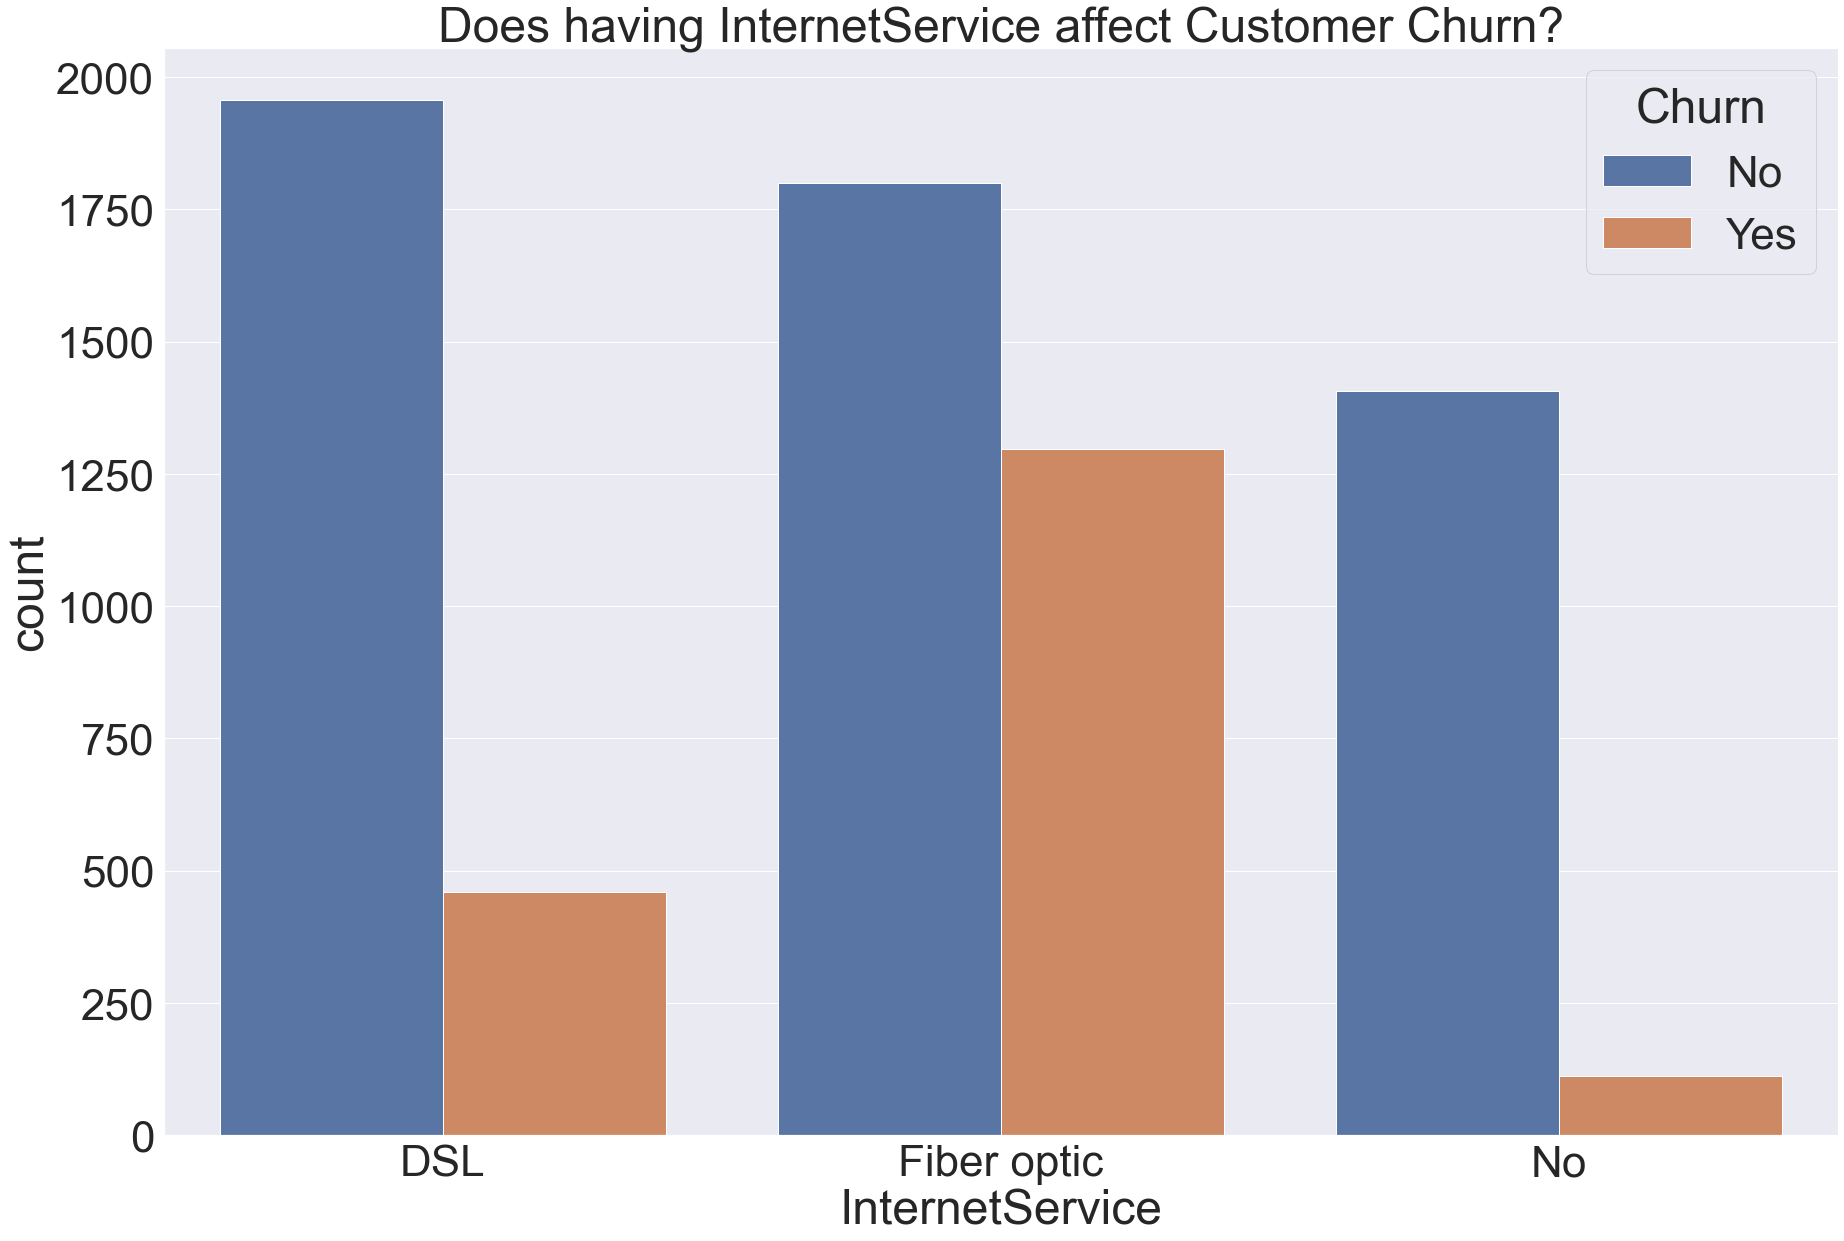

In [245]:
sns.set(font_scale=4)
sns.countplot(x='InternetService', hue='Churn', data=data).set_title('Does having InternetService affect Customer Churn?')
plt.show()

# Observation: Customers with Fiber Optic connection seem to Churn more and those without an internet connection have the highest retention.

# There are six additional features for customers with Internet. Let's explore them.

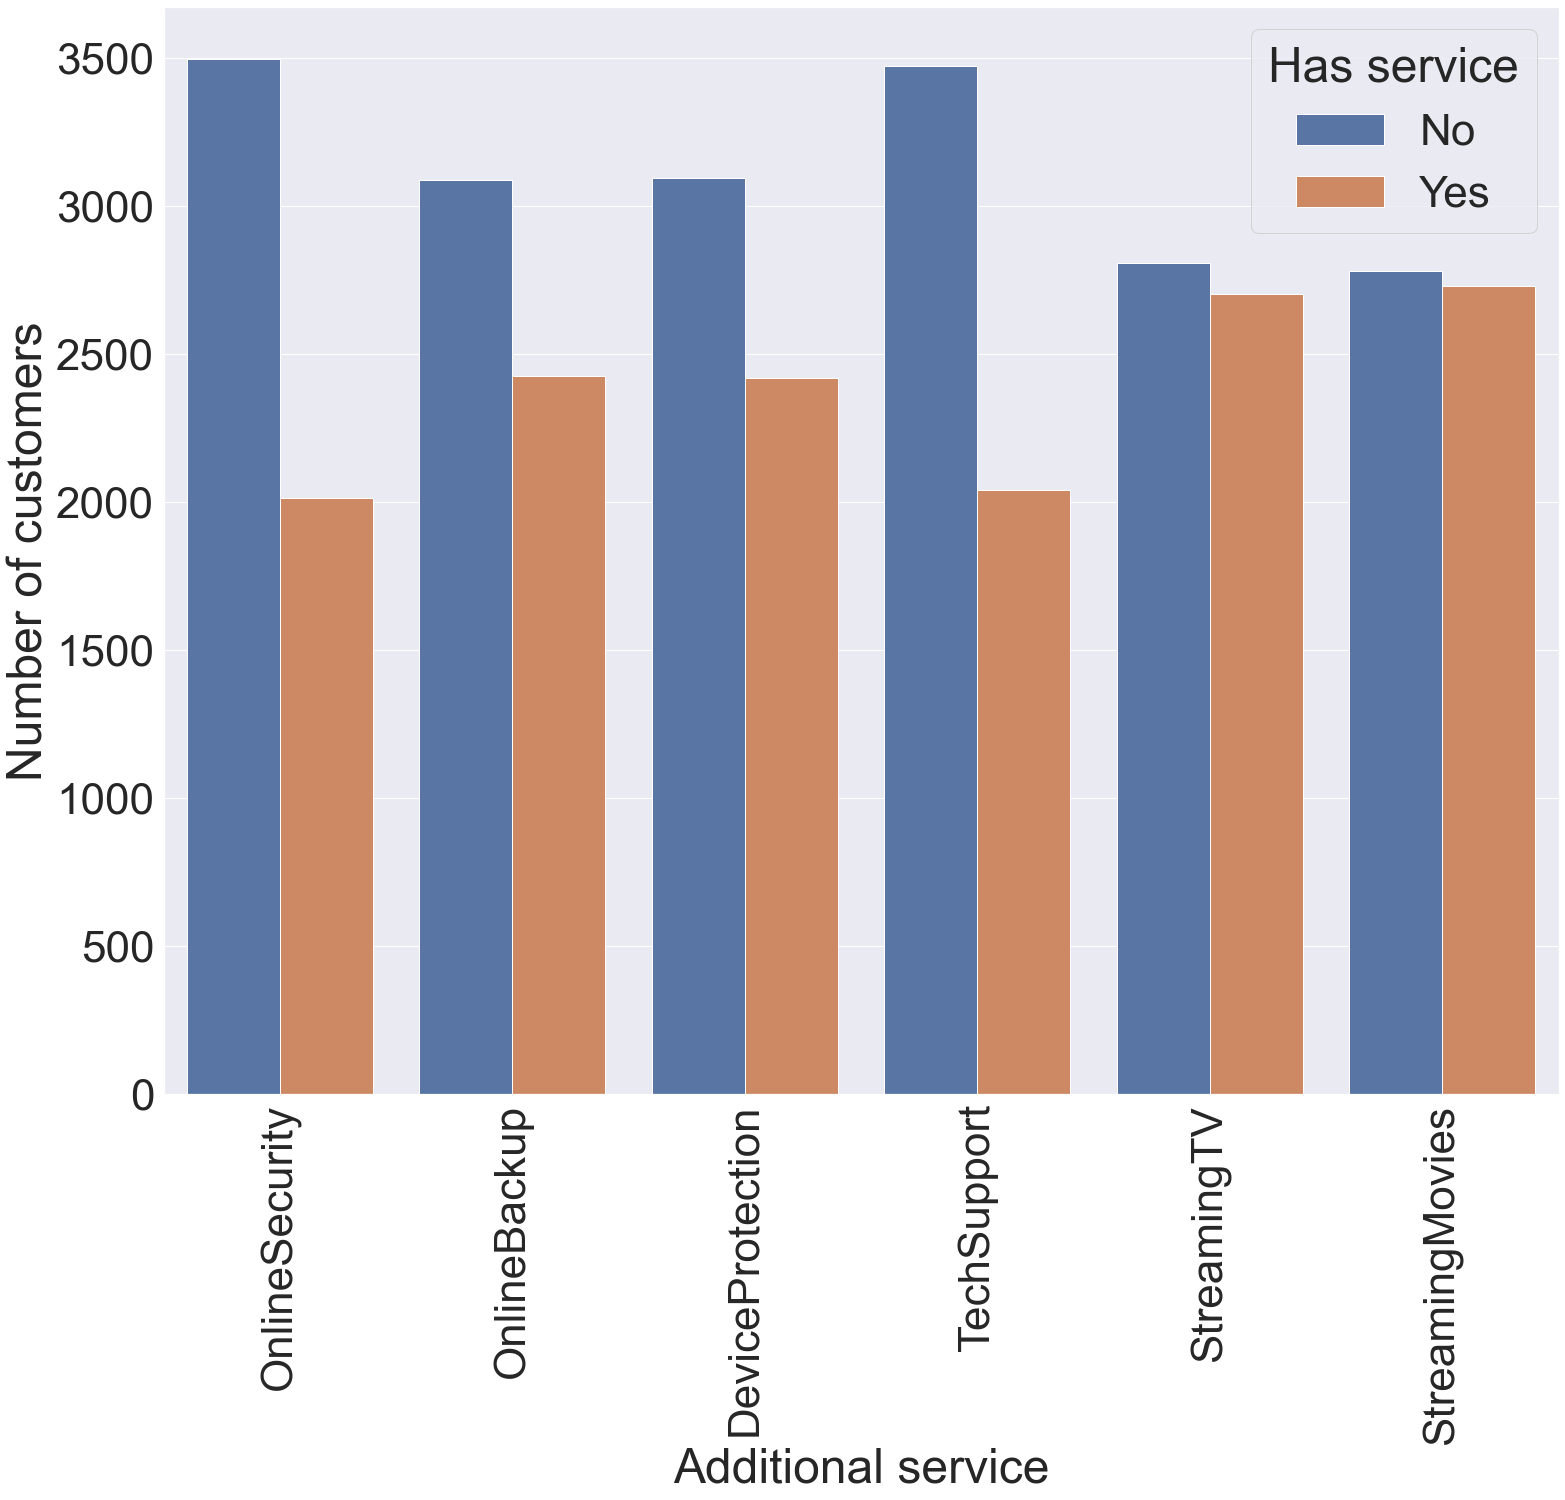

In [246]:
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data_internet = pd.melt(data[data['InternetService'] != 'No'][columns]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(25, 20))
plt.xticks(rotation=90)
ax = sns.countplot(data=data_internet, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Number of customers')
plt.show()

# The above graph suggests that the customers with first 4 additional features are more unlikely to Churn.
# Let's look at one feature at a time

# 8. Online security vs Churn

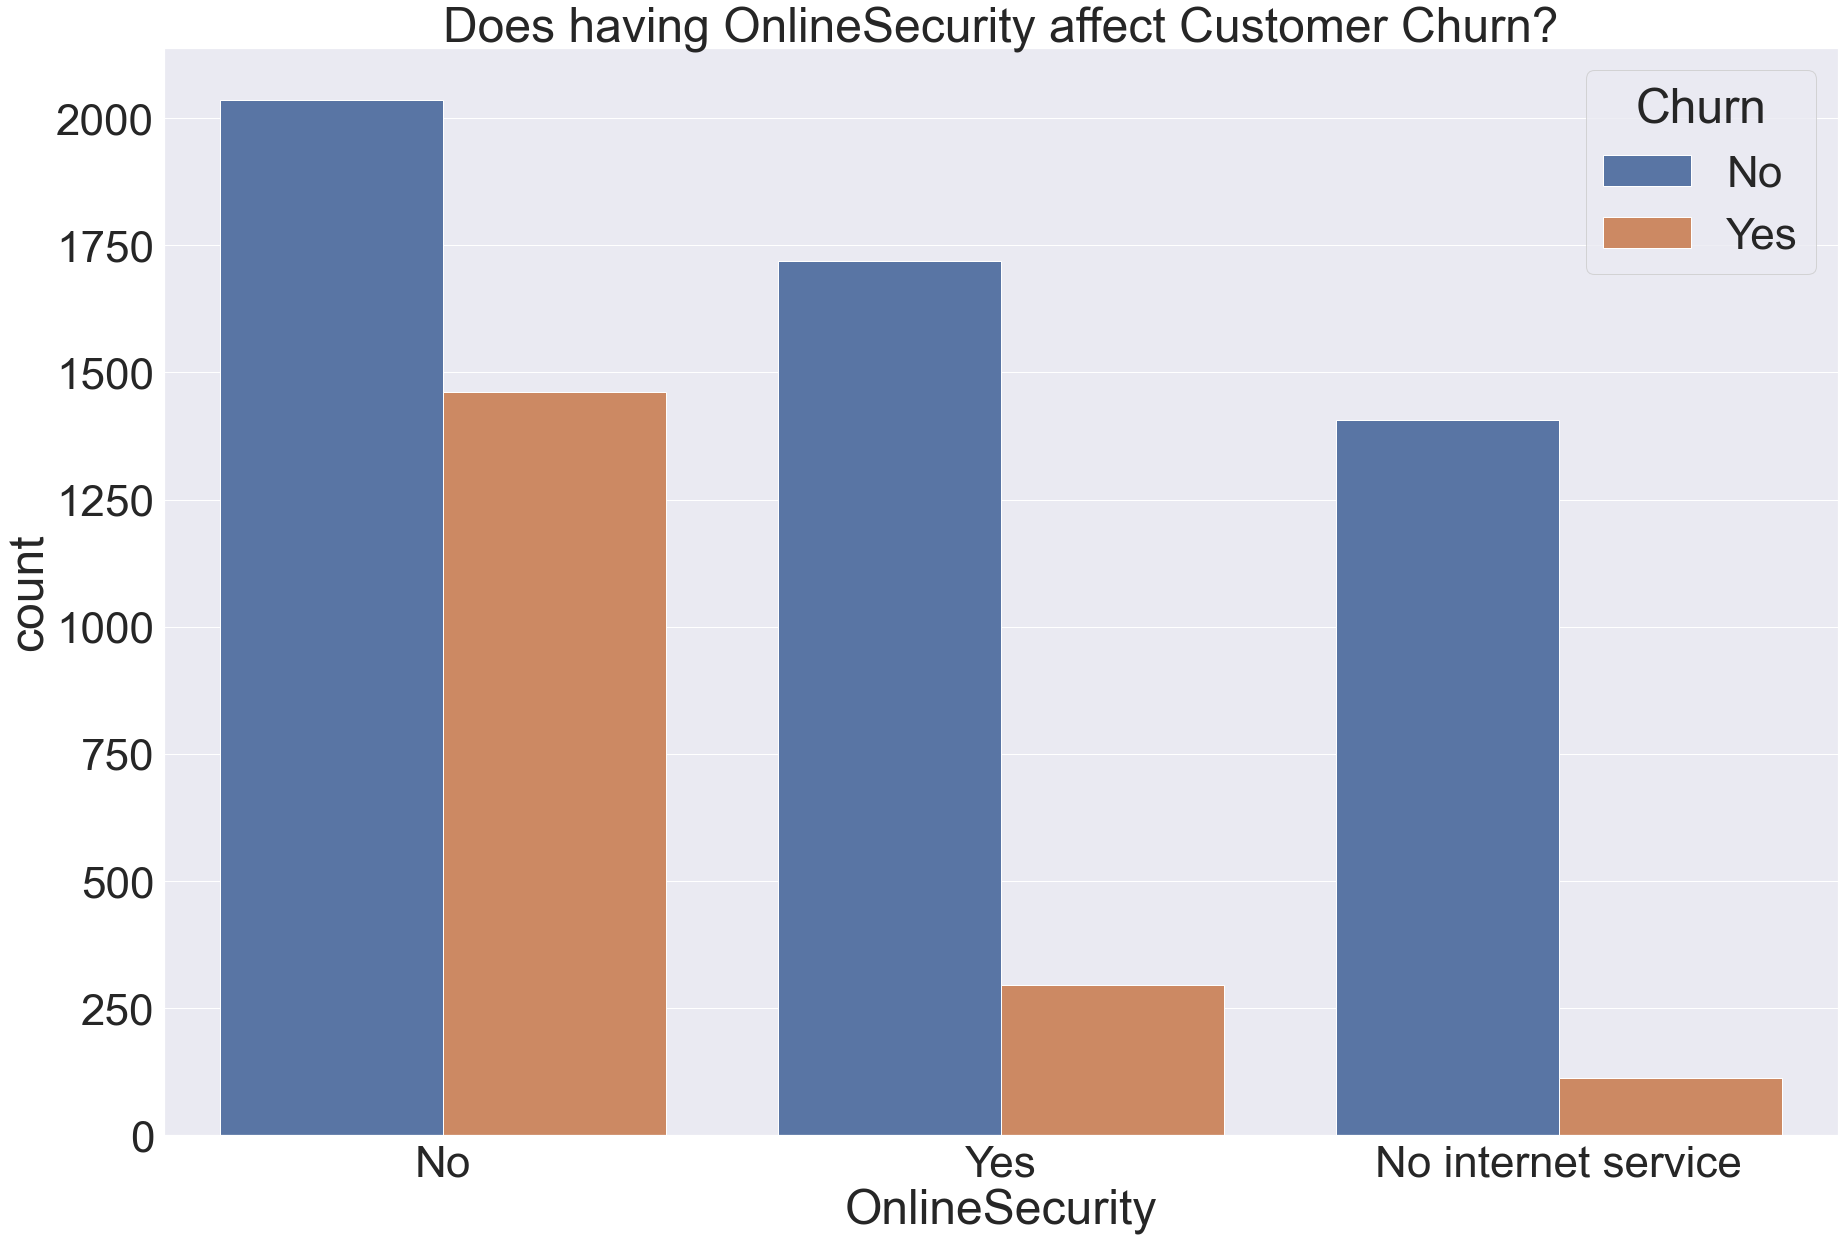

In [247]:
sns.set(font_scale=4)
sns.countplot(x='OnlineSecurity', hue='Churn', data=data).set_title('Does having OnlineSecurity affect Customer Churn?')
plt.show()

# People without OnlineSecurity are more likely to Churn.

# 9. OnlineBackup vs Churn

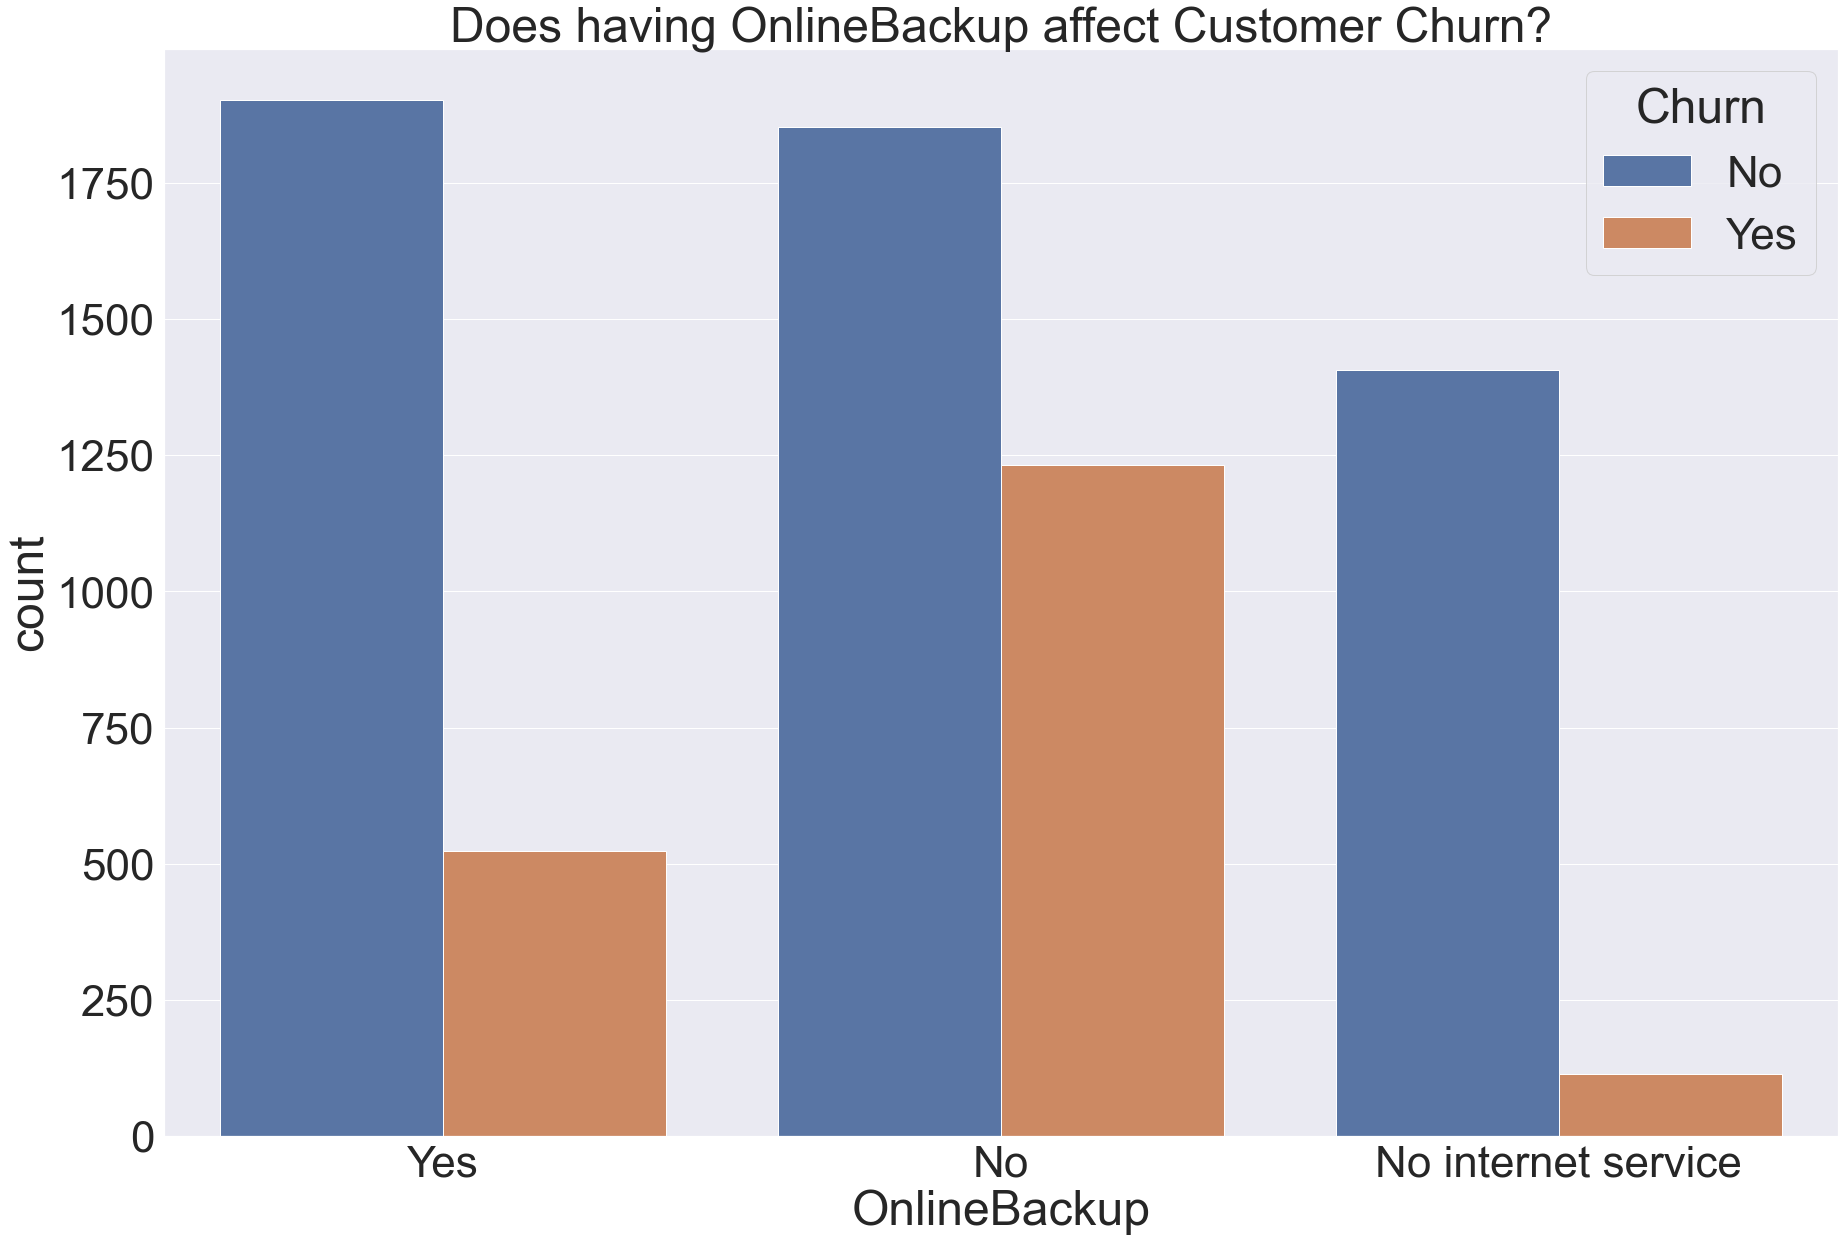

In [248]:
sns.set(font_scale=4)
sns.countplot(x='OnlineBackup', hue='Churn', data=data).set_title('Does having OnlineBackup affect Customer Churn?')
plt.show()

# Same as previous feature, people without OnlineBackup are more likely to Churn.

# 10. DeviceProtection vs Churn

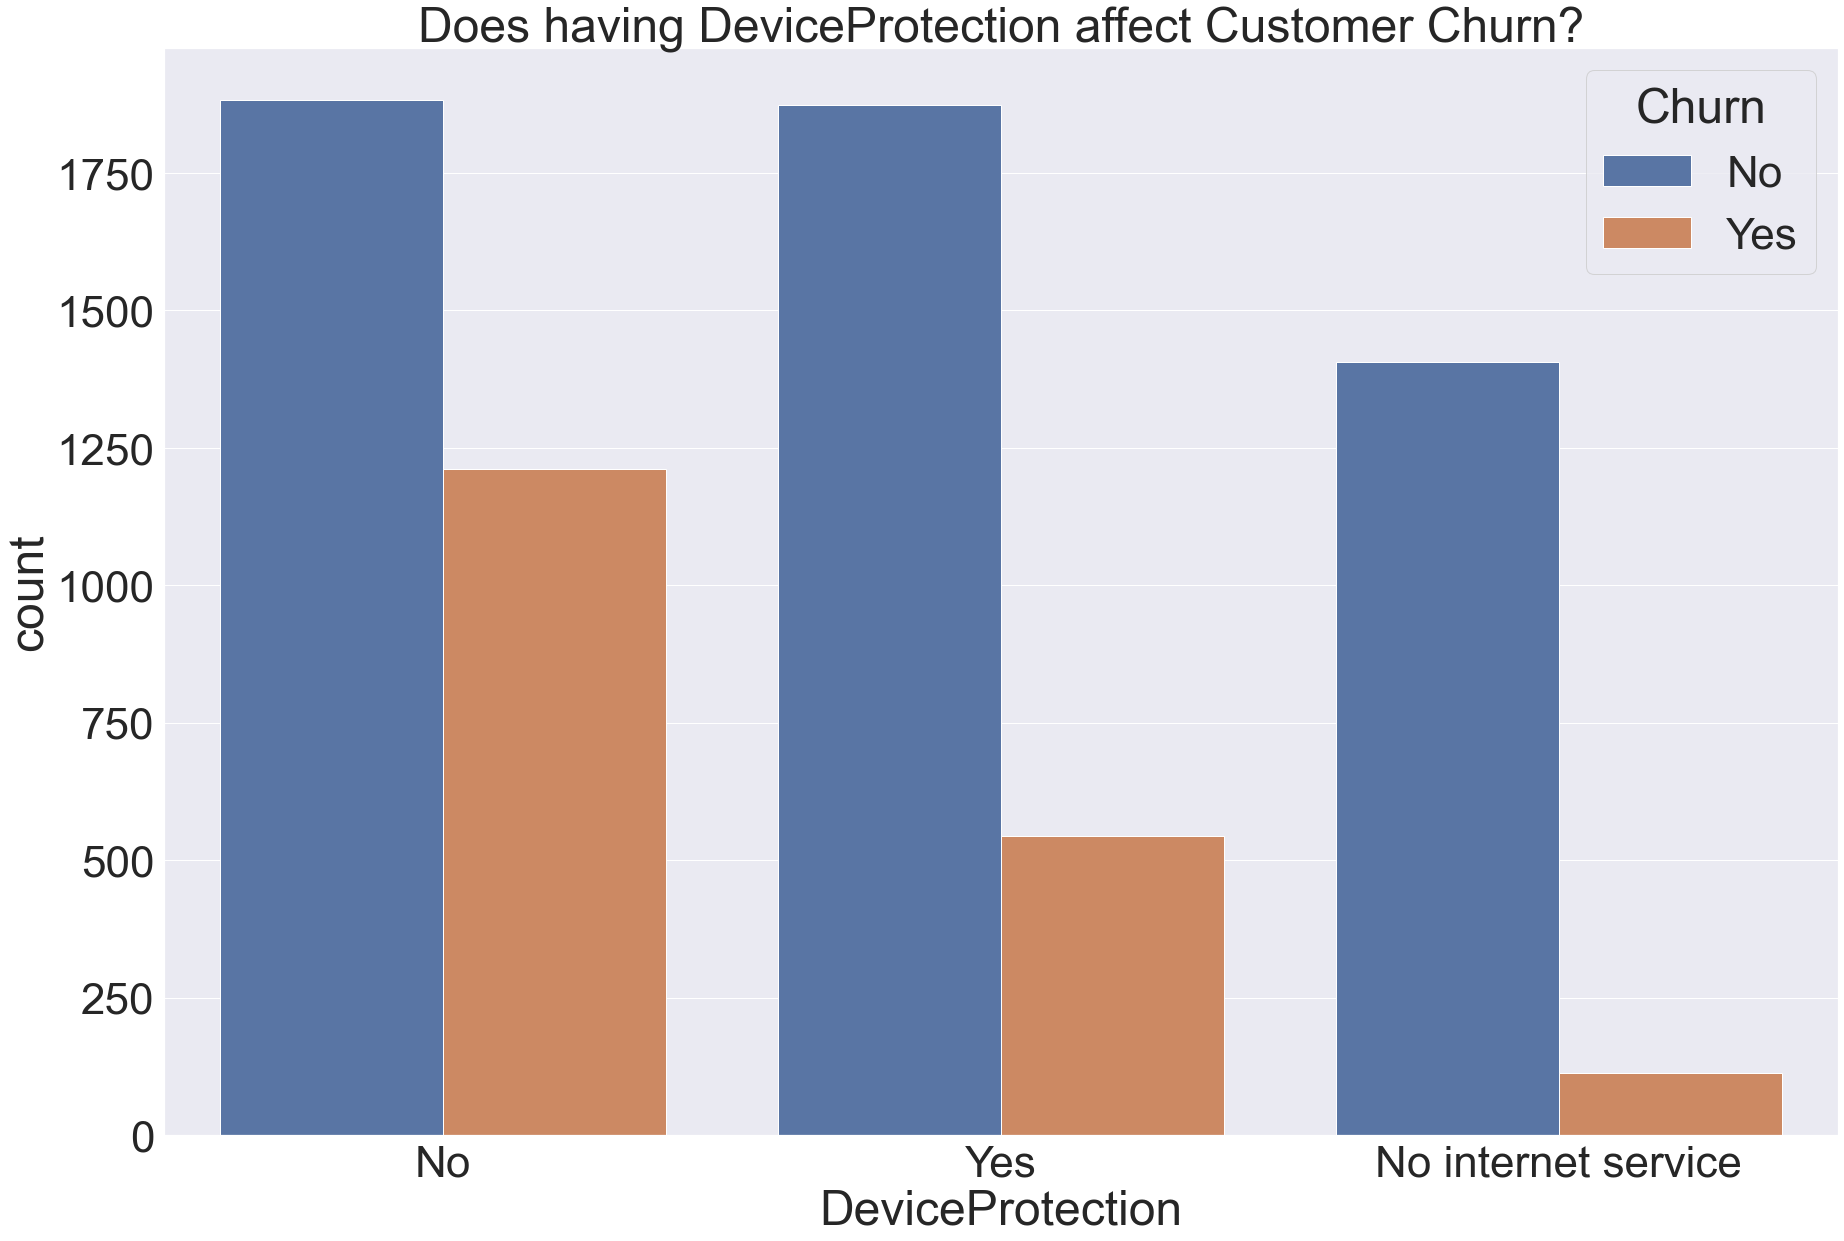

In [249]:
sns.set(font_scale=4)
sns.countplot(x='DeviceProtection', hue='Churn', data=data).set_title('Does having DeviceProtection affect Customer Churn?')
plt.show()

# People without DeviceProtection are more likely to Churn.

# 11. TechSupport vs Churn

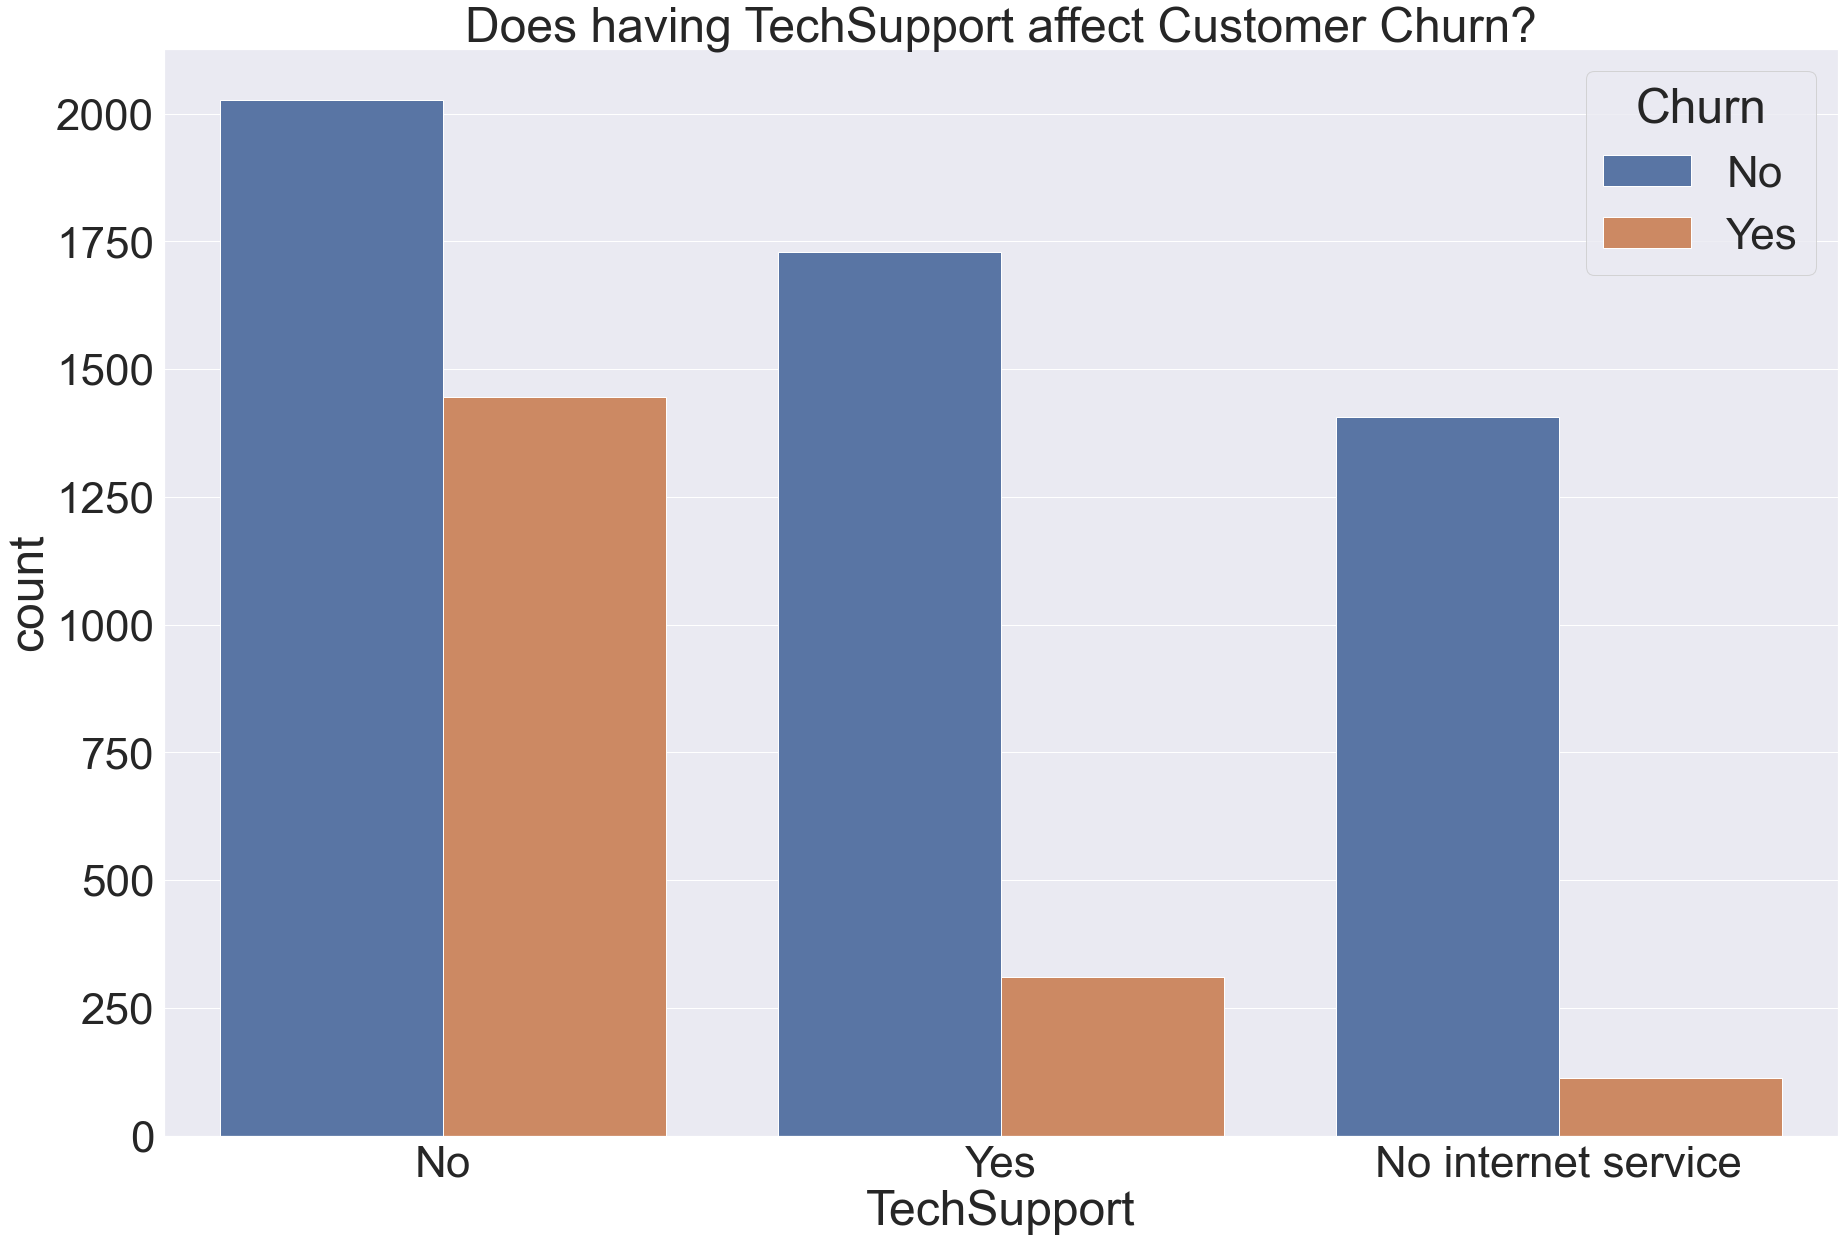

In [250]:
sns.set(font_scale=4)
sns.countplot(x='TechSupport', hue='Churn', data=data).set_title('Does having TechSupport affect Customer Churn?')
plt.show()

# People without TechSupport are more likely to Churn.

# 12. StreamingTV vs Churn

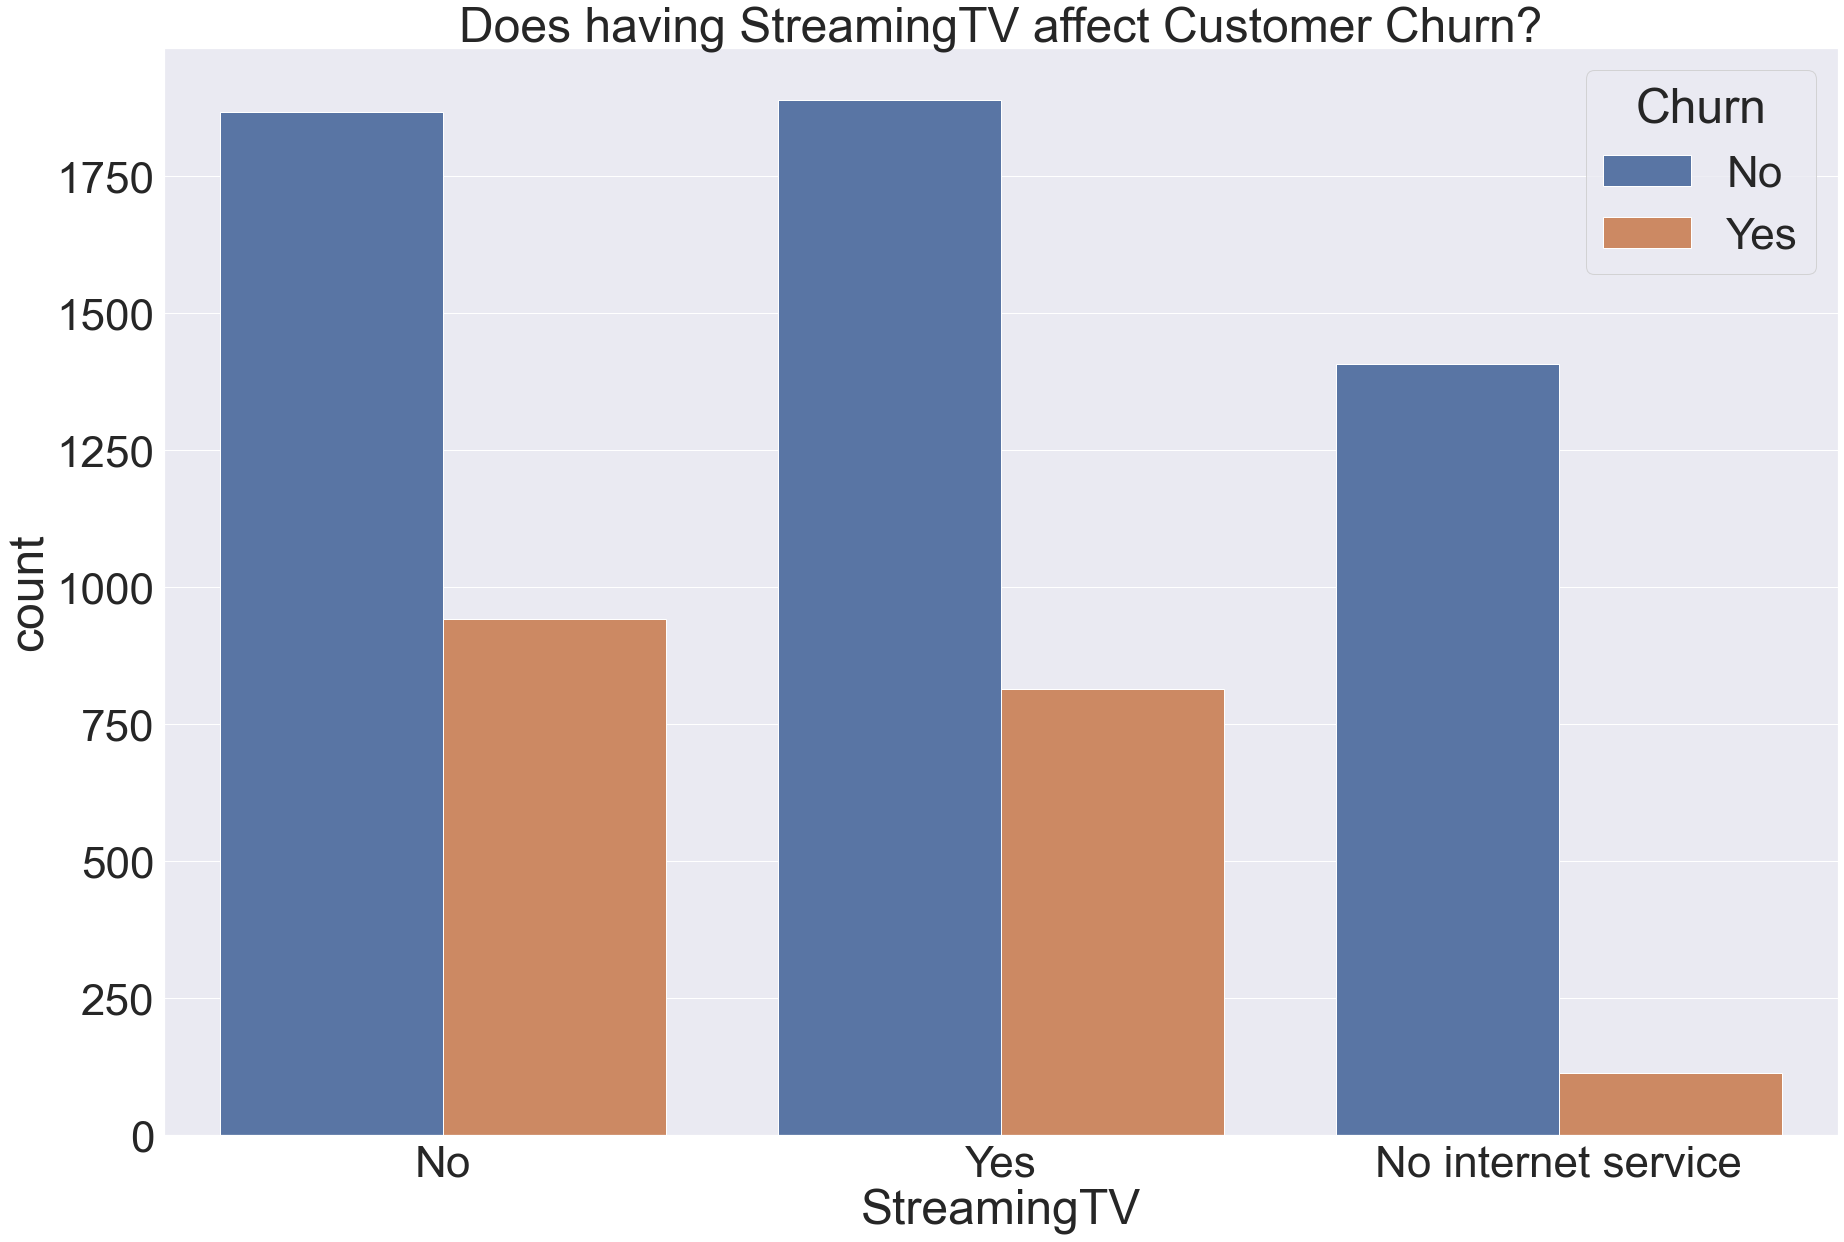

In [251]:
sns.set(font_scale=4)
sns.countplot(x='StreamingTV', hue='Churn', data=data).set_title('Does having StreamingTV affect Customer Churn?')
plt.show()

# This feature doesn't seem to affect Customer Churn.

# 13. StreamingMovies vs Churn

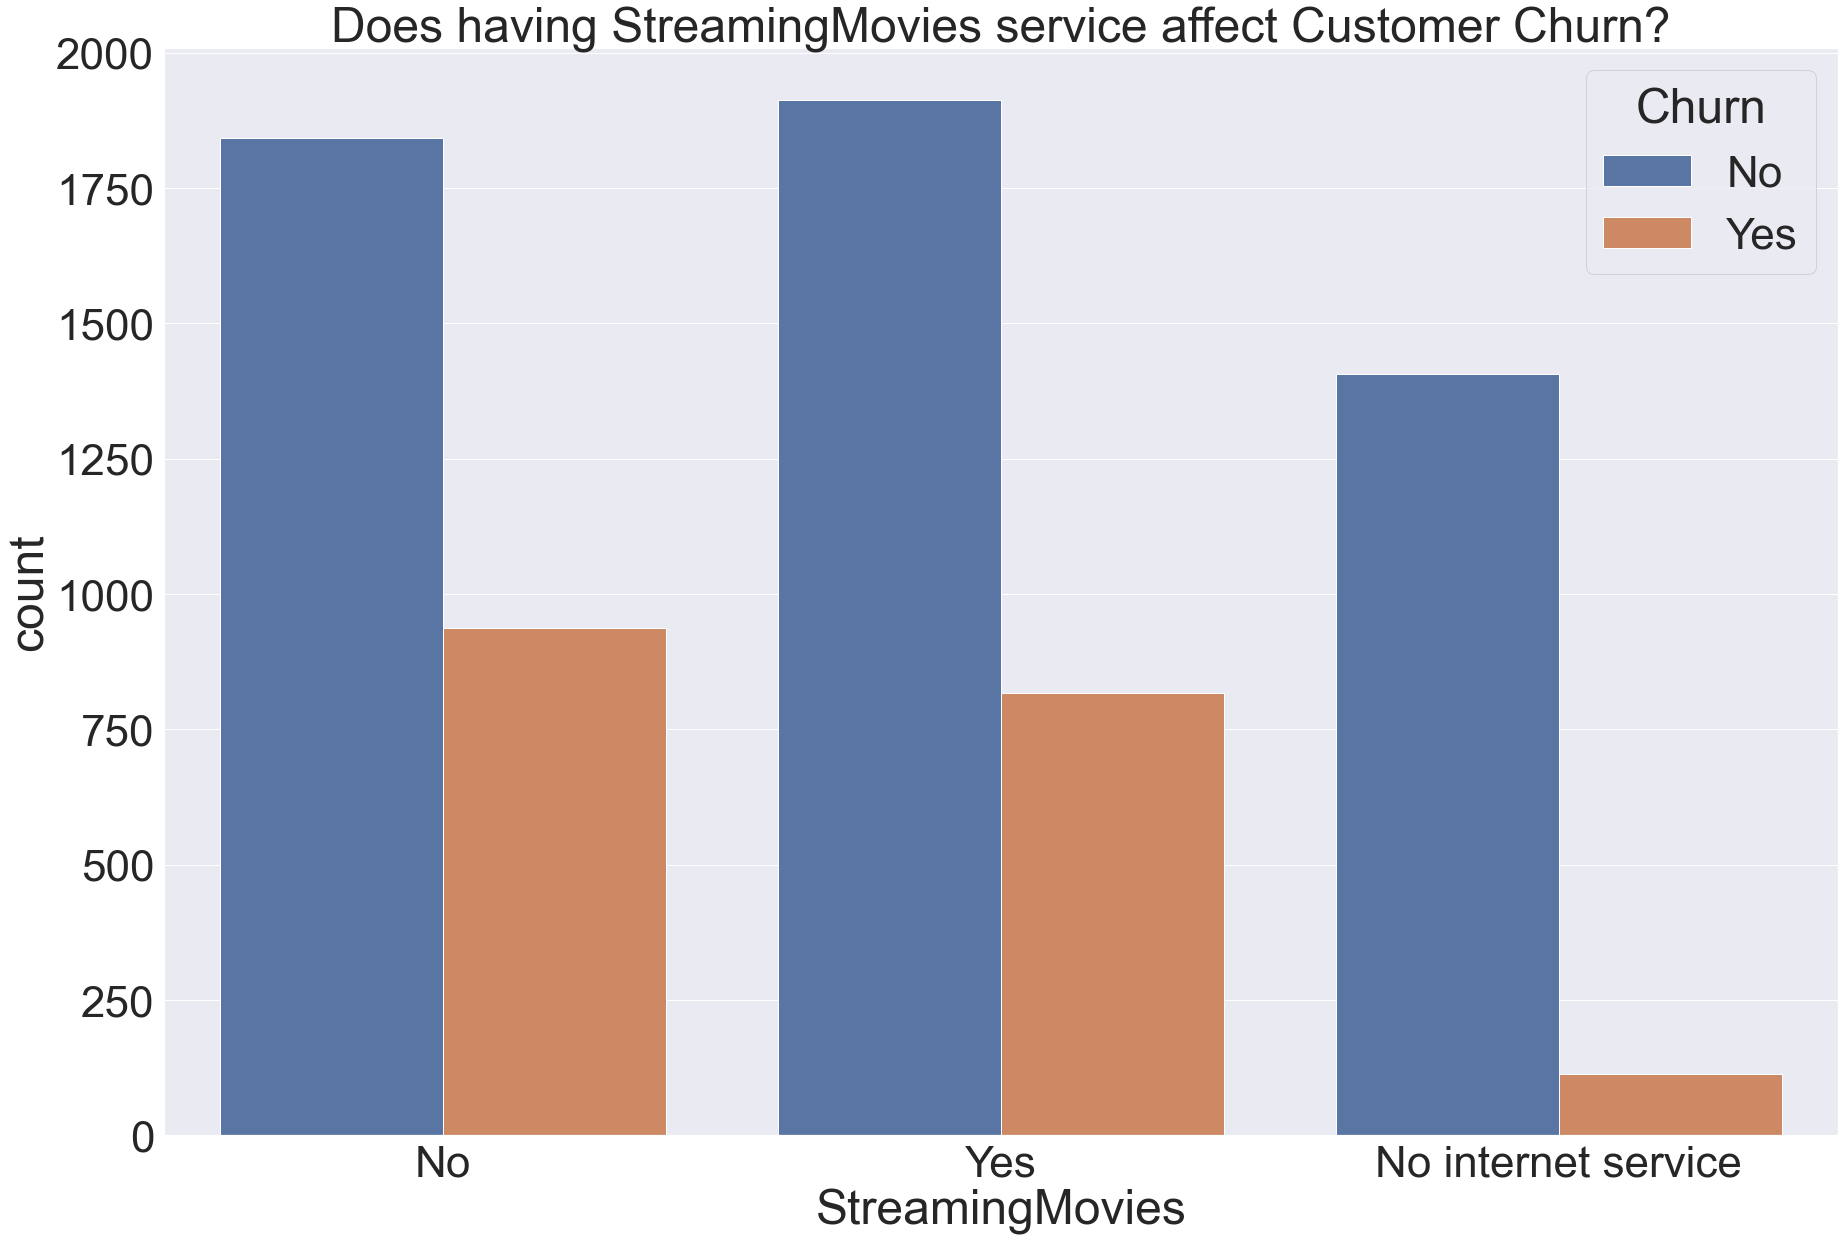

In [252]:
sns.set(font_scale=4)
sns.countplot(x='StreamingMovies', hue='Churn', data=data).set_title('Does having StreamingMovies service affect Customer Churn?')
plt.show()

# This feature doesn't seem to affect Customer Churn.

# As predicted in the beginning the first 4 additional features associated with Internet Service affect Churn, while the last two doesn't.

# 14. PaymentMethod vs Churn

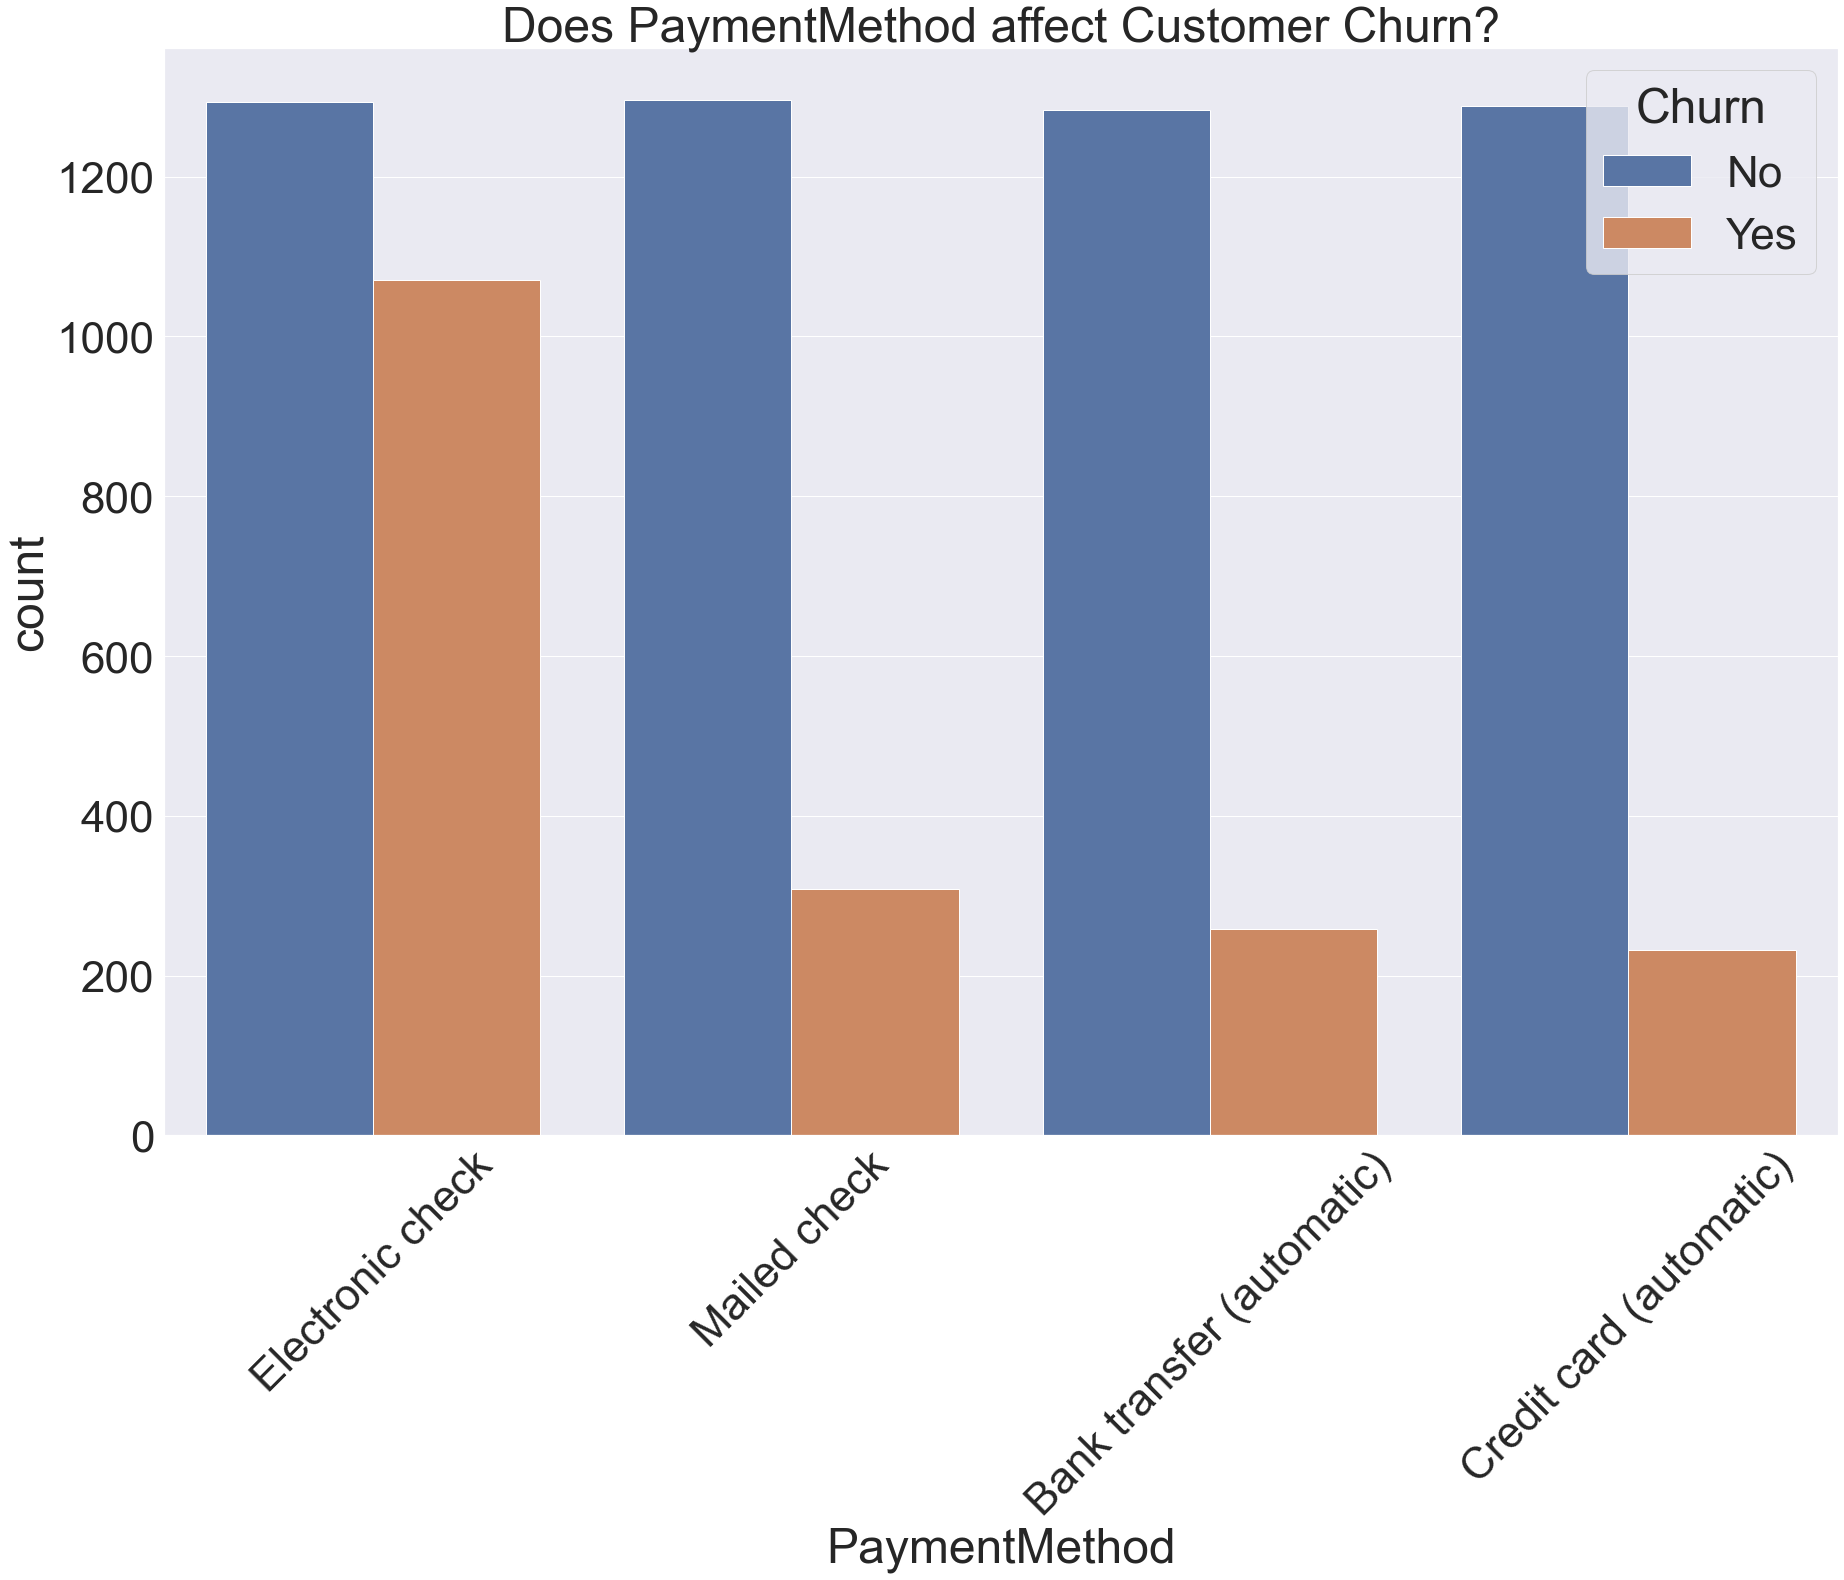

In [253]:
sns.set(font_scale=4)
sns.countplot(x='PaymentMethod', hue='Churn', data=data).set_title('Does PaymentMethod affect Customer Churn?')
plt.xticks(rotation=45)
plt.show()

# Observation: It's quite intriguing to see that customers with Electronic Check as payment method have higher Churn rate.

# 15. Contract type vs Churn

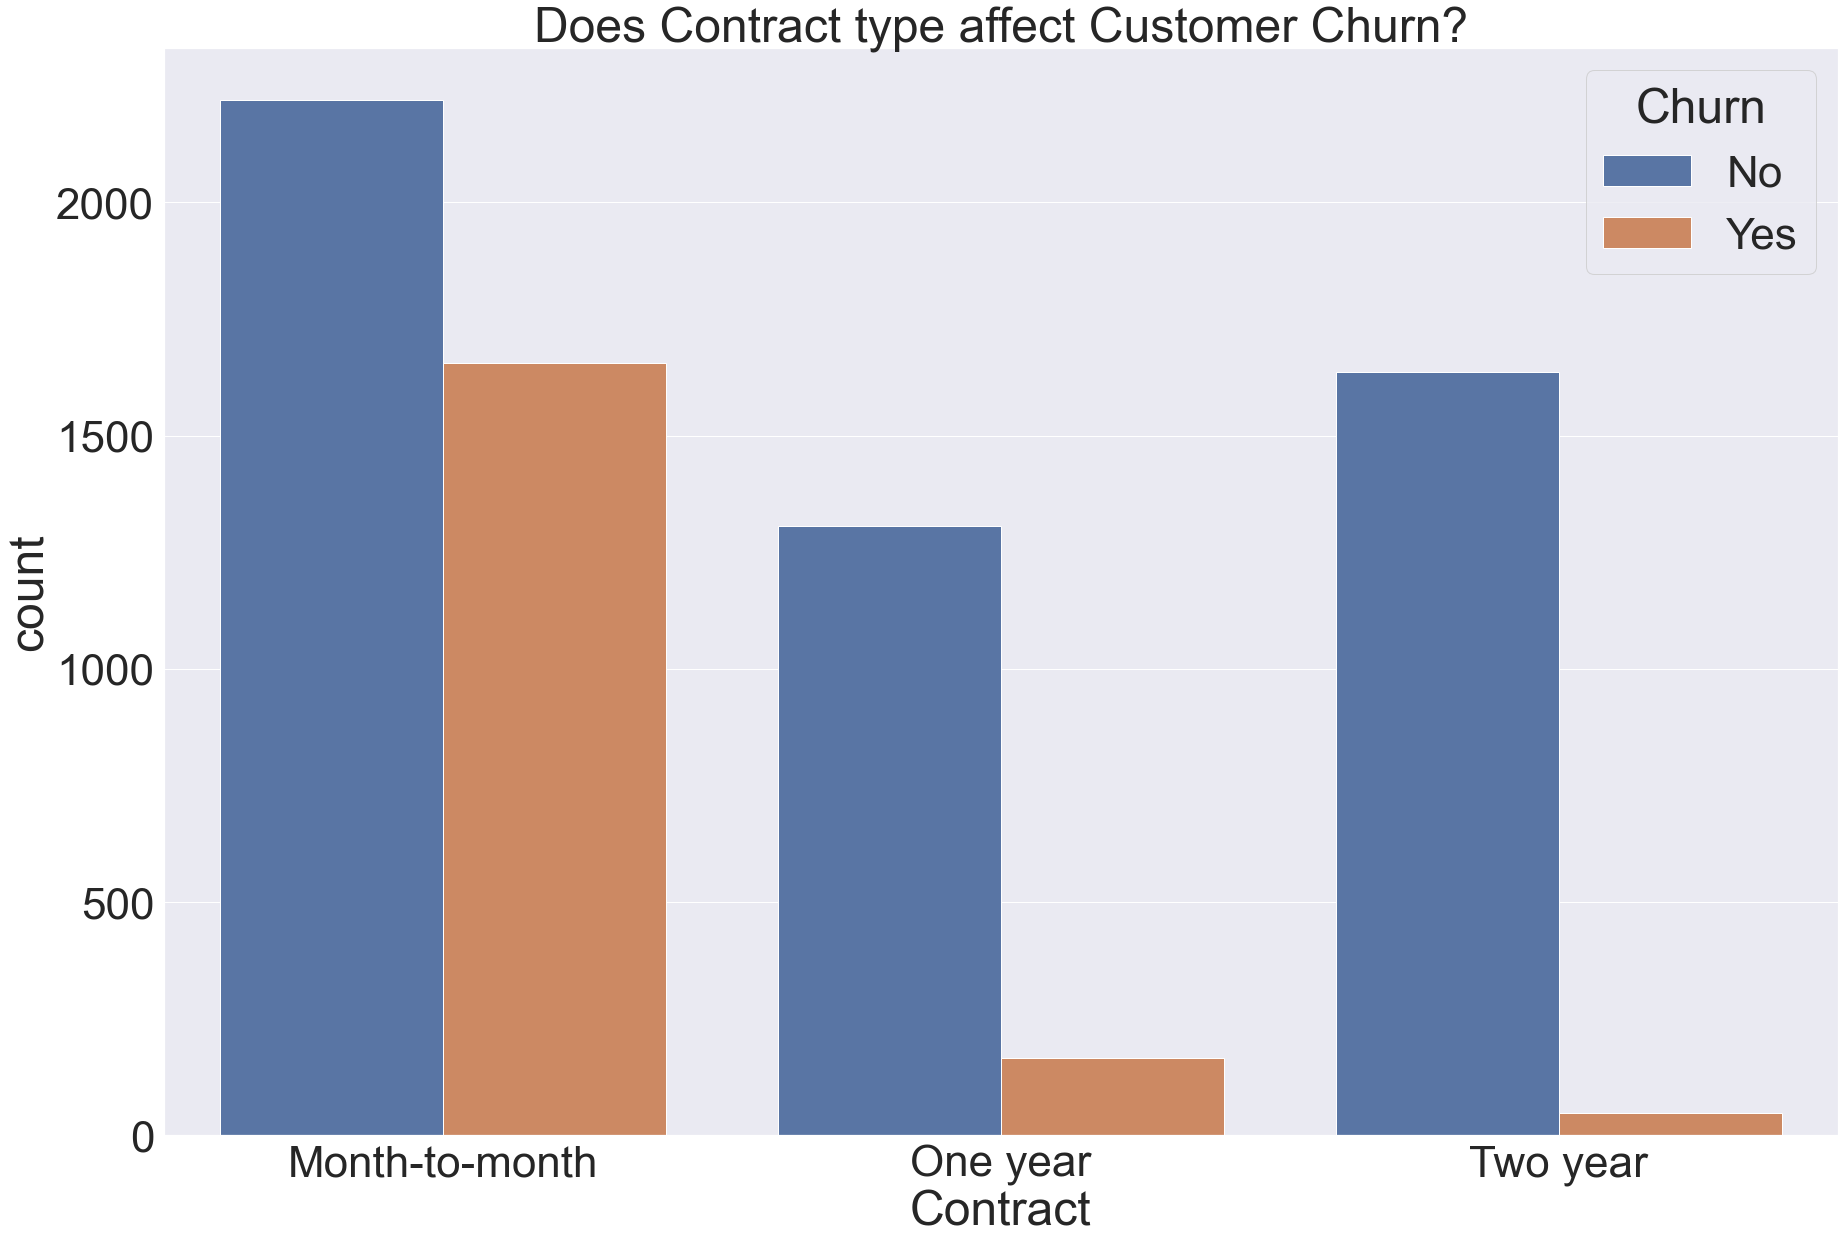

In [254]:
sns.set(font_scale=4)
sns.countplot(x='Contract', hue='Churn', data=data).set_title('Does Contract type affect Customer Churn?')
plt.show()

# Observation: It's clearly seen that those customers with yearly contract are less likely to Churn(Loyal customers), while those with monthly billing are more likely to Churn.

In [255]:
# Let's also look at percentages
total_customers = data_cleaned['customerID'].count()
data_cleaned['ones'] = 1
grouped_contract = data_cleaned.groupby("Contract")['ones','Churn_Labeled'].sum().reset_index()
grouped_contract.rename(columns={'ones' : 'total_customers','Churn_Labeled' : 'churn_customers'},inplace=True)
grouped_contract['percentage_of_churns'] = (grouped_contract['churn_customers'] / grouped_contract['total_customers']) * 100
grouped_contract['percentage_of_not_churns'] = 100 - grouped_contract['percentage_of_churns']
grouped_contract.head()

Contract  total_customers  churn_customers  percentage_of_churns  \
0  Month-to-month             3875             1655             42.709677   
1        One year             1472              166             11.277174   
2        Two year             1685               48              2.848665   

   percentage_of_not_churns  
0                 57.290323  
1                 88.722826  
2                 97.151335

In [256]:
fig_churn_contract = px.bar(grouped_contract,x="Contract",y="percentage_of_churns",title="Contract type vs Churn")
fig_churn_contract.show()

# Observation: The percentage probability of churn drops from 42.7% to 11.3%, when a customer moves from monthly contract to yearly contract, quite a significant influence this feature has!!

# 16. PaperlessBilling vs Churn


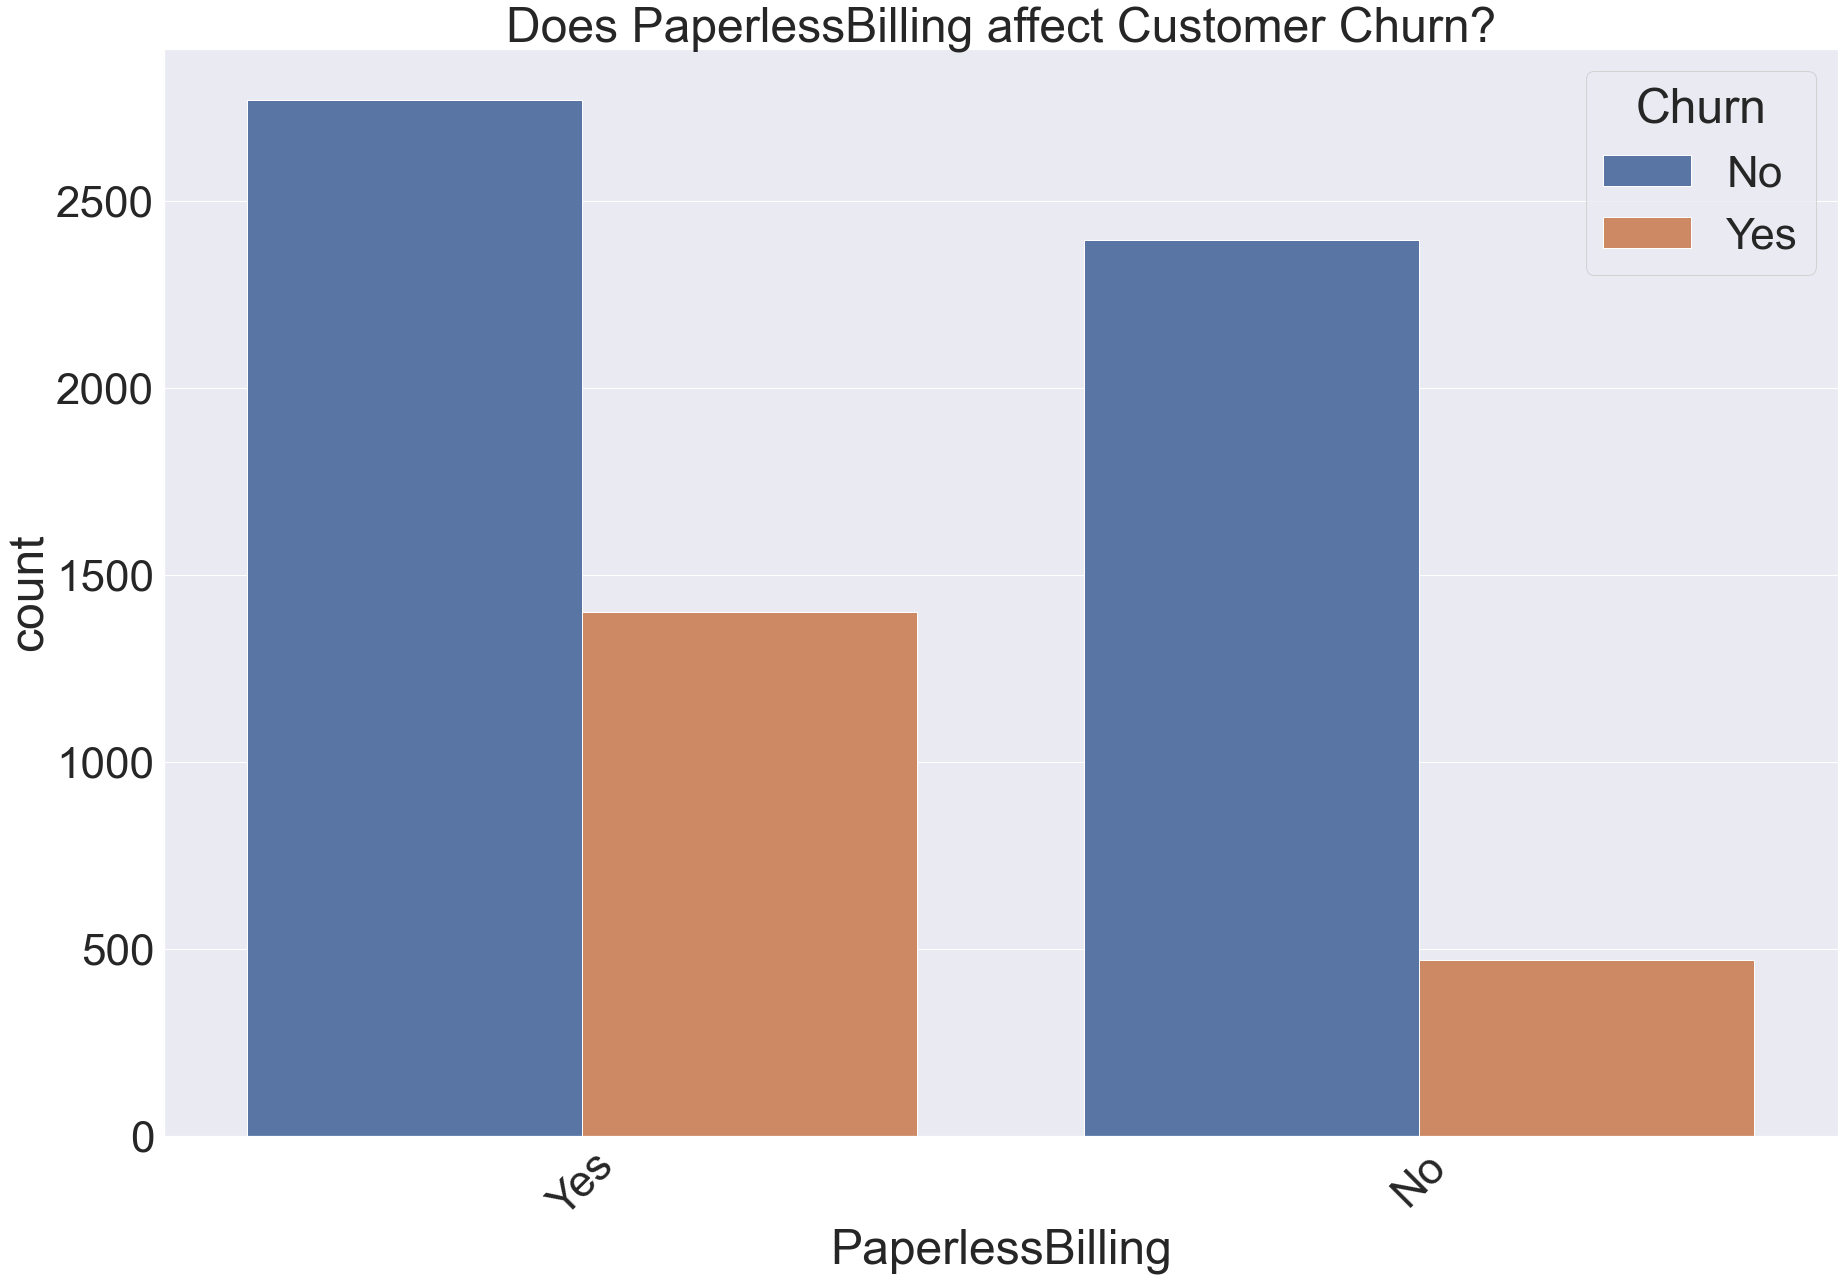

In [257]:
sns.set(font_scale=4)
sns.countplot(x='PaperlessBilling', hue='Churn', data=data).set_title('Does PaperlessBilling affect Customer Churn?')
plt.xticks(rotation=45)
plt.show()

# Observation: it looks like the customers who use paperless billing are more likely to churn than those who use paperless billing.

# Correlation between features

In [258]:
data_cleaned = data_cleaned.drop(['customerID','ones'],axis=1)

In [261]:
data_corr = data_cleaned.corr()
data_corr

SeniorCitizen    tenure  MonthlyCharges  \
SeniorCitizen                  1.000000  0.015683        0.219874   
tenure                         0.015683  1.000000        0.246862   
MonthlyCharges                 0.219874  0.246862        1.000000   
TotalCharges                   0.102411  0.825880        0.651065   
Churn_Labeled                  0.150541 -0.354049        0.192858   
PhoneService_Labeled           0.008392  0.007877        0.248033   
OnlineSecurity_Labeled        -0.127937  0.327283       -0.053576   
TechSupport_Labeled           -0.151007  0.324729       -0.008237   
StreamingTV_Labeled            0.031019  0.290572        0.337156   
StreamingMovies_Labeled        0.047088  0.296785        0.335761   
PaperlessBilling_Labeled       0.156258  0.004823        0.351930   
gender_Labeled                -0.001819  0.005285       -0.013779   
Partner_Labeled                0.016957  0.381912        0.097825   
Dependents_Labeled            -0.210550  0.163386       -0.112343   

                          TotalCharges  Churn_Labeled  PhoneService_Labeled  \
SeniorCitizen                 0.102411       0.150541              0.008392   
tenure                        0.825880      -0.354049              0.007877   
MonthlyCharges                0.651065       0.192858              0.248033   
TotalCharges                  1.000000      -0.199484              0.113008   
Churn_Labeled                -0.199484       1.000000              0.011691   
PhoneService_Labeled          0.113008       0.011691              1.000000   
OnlineSecurity_Labeled        0.254473      -0.289050             -0.014163   
TechSupport_Labeled           0.276890      -0.282232             -0.018136   
StreamingTV_Labeled           0.392472      -0.036303              0.056393   
StreamingMovies_Labeled       0.398088      -0.038802              0.043025   
PaperlessBilling_Labeled      0.157830       0.191454              0.016696   
gender_Labeled                0.000048      -0.008545             -0.007515   
Partner_Labeled               0.319072      -0.149982              0.018397   
Dependents_Labeled            0.064653      -0.163128             -0.001078   

                          OnlineSecurity_Labeled  TechSupport_Labeled  \
SeniorCitizen                          -0.127937            -0.151007   
tenure                                  0.327283             0.324729   
MonthlyCharges                         -0.053576            -0.008237   
TotalCharges                            0.254473             0.276890   
Churn_Labeled                          -0.289050            -0.282232   
PhoneService_Labeled                   -0.014163            -0.018136   
OnlineSecurity_Labeled                  1.000000             0.284875   
TechSupport_Labeled                     0.284875             1.000000   
StreamingTV_Labeled                     0.044399             0.161168   
StreamingMovies_Labeled                 0.056313             0.162530   
PaperlessBilling_Labeled               -0.157723            -0.113617   
gender_Labeled                         -0.014899            -0.006695   
Partner_Labeled                         0.150610             0.126488   
Dependents_Labeled                      0.151198             0.132530   

                          StreamingTV_Labeled  StreamingMovies_Labeled  \
SeniorCitizen                        0.031019                 0.047088   
tenure                               0.290572                 0.296785   
MonthlyCharges                       0.337156                 0.335761   
TotalCharges                         0.392472                 0.398088   
Churn_Labeled                       -0.036303                -0.038802   
PhoneService_Labeled                 0.056393                 0.043025   
OnlineSecurity_Labeled               0.044399                 0.056313   
TechSupport_Labeled                  0.161168                 0.162530   
StreamingTV_Labeled                  1.000

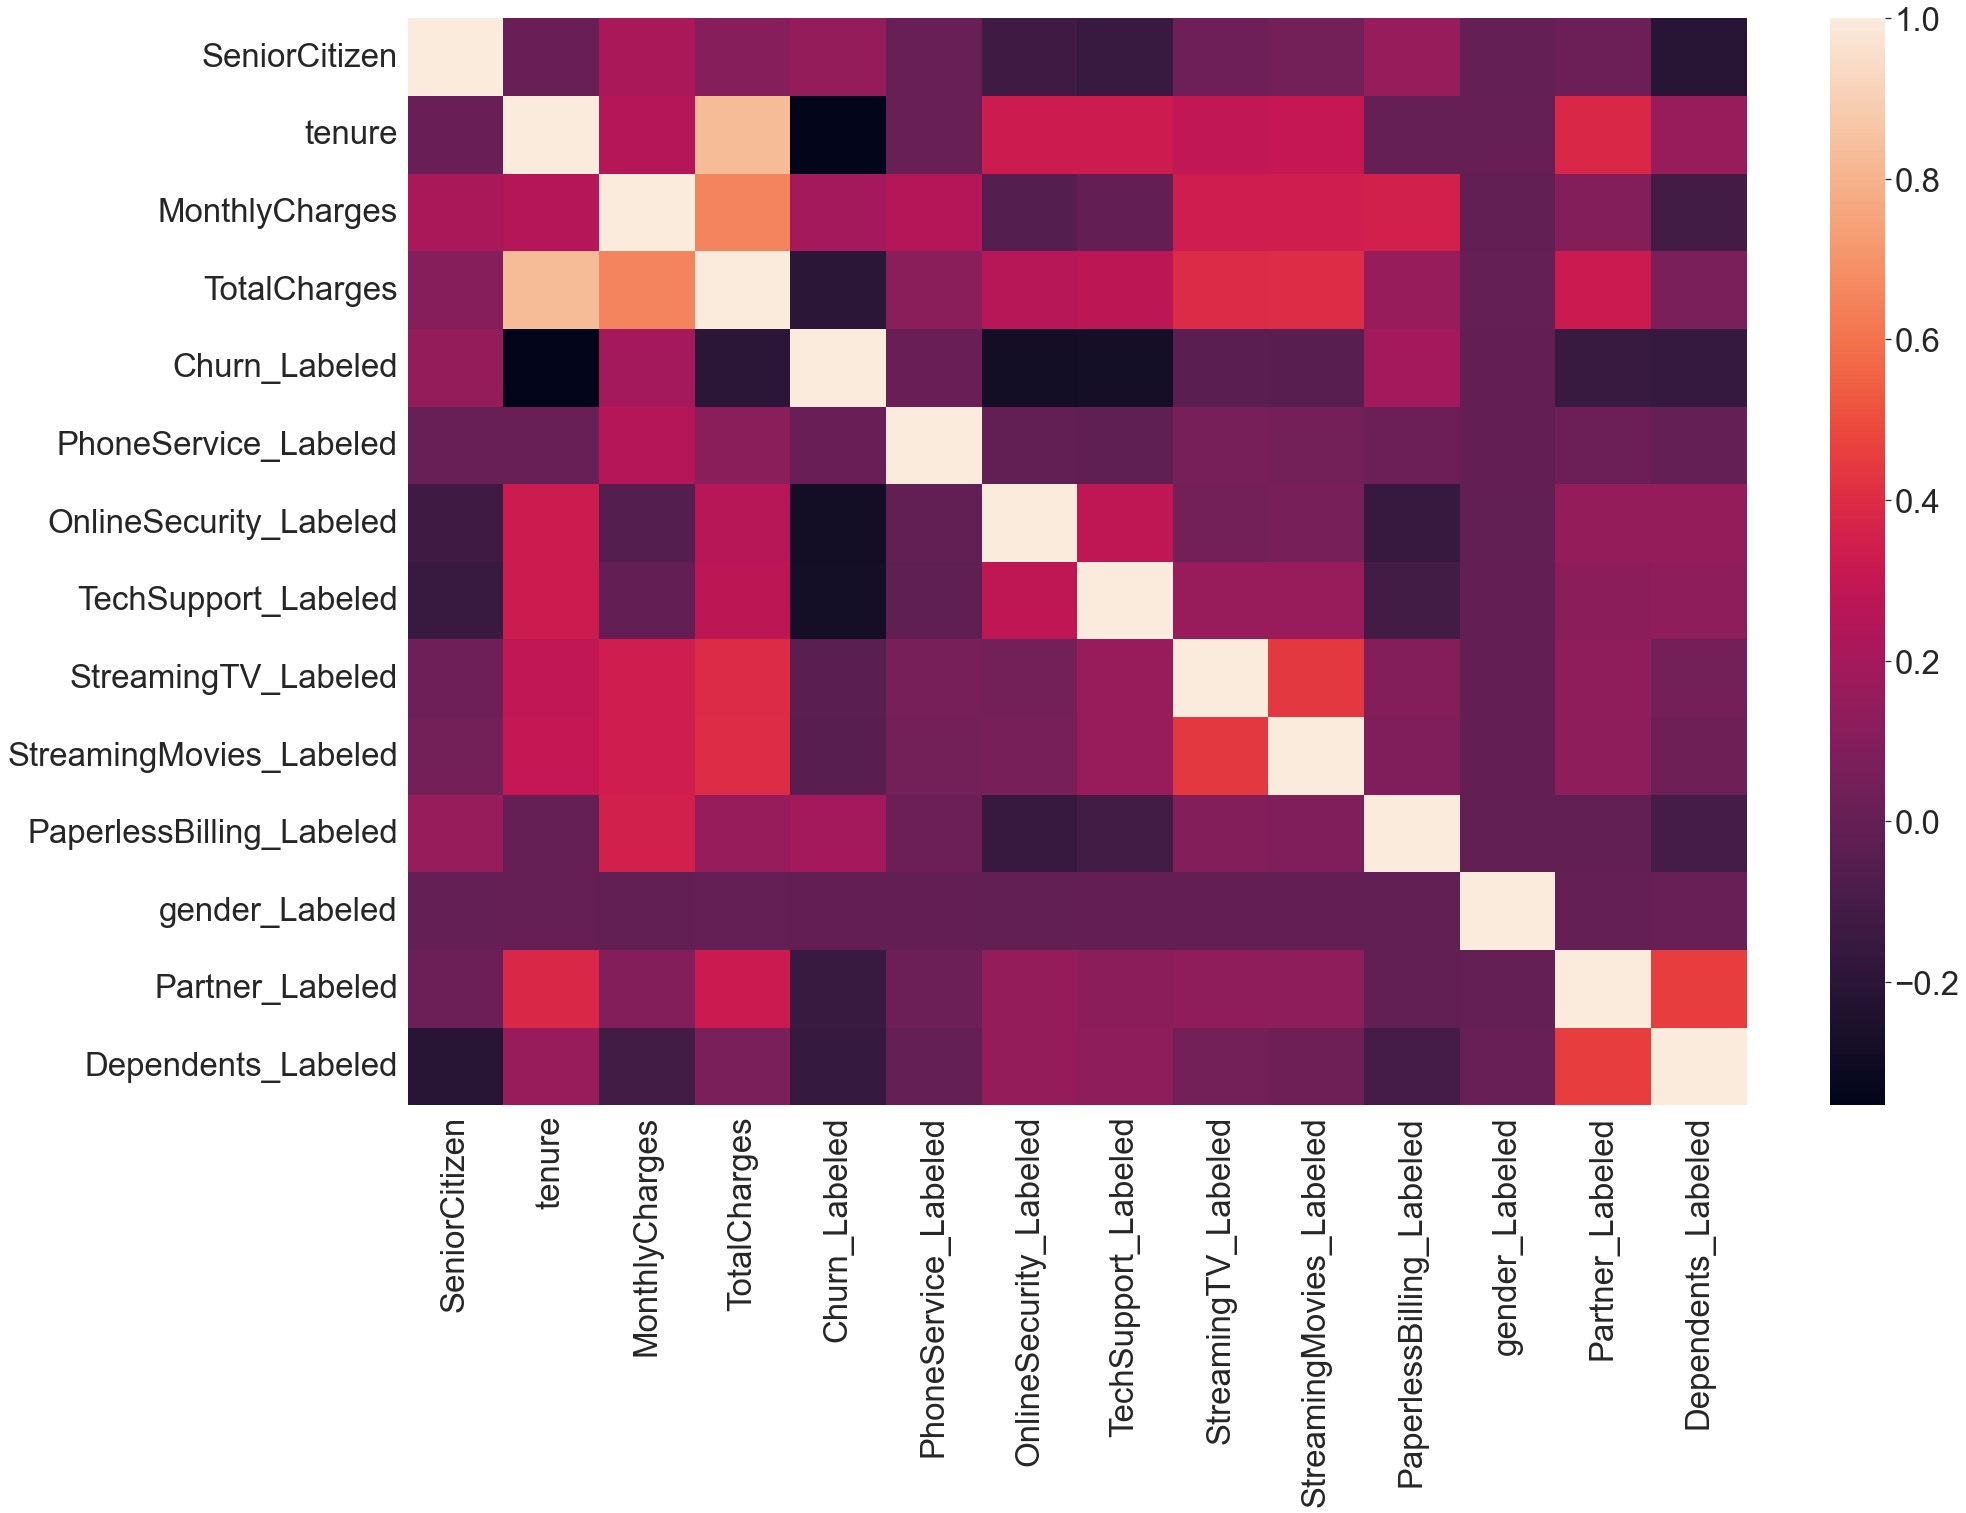

In [262]:
# Heatmap
sns.set(font_scale=3)
sns.heatmap(data_corr)
plt.show()

# Observations:<br>
   # 1. Strong correlation is observed between Monthly Charges and Total Charges<br>
   # 2. Strong correlation is observed between Total Charges and Tenure<br>
   # 3. Strong correlation is observed between Total Charges and StreamingTV & StreamingMovies, which shows that as the services increase the total charges increase.<br>
   # 4. StreamingTV has strong correlation with StreamingMovies, which means that customers who have StreamingTV also                  tend to buy StreamingMovies.<br>
   # 5. TechSupport has strong correlation with OnlineSecurity, which means that people who have brought techSupport also buy          OnlineSecurity.<br>
   # 6. Tenure also has strong correlation with OnlineSecurity and TechSupport, which means that long term customers tend to buy        these two features.<br>
   # 7. there is a good correlation between tenure and partner, which shows that those having partners have a tendency to churn less, as the decision might depend on two people.<br>
   # 8. There is also a good correlation between dependants and partners

# Feature Importance

In [263]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ones'],
      dtype='object')

In [264]:
data_new = data.drop(['customerID','ones'],axis=1)

In [265]:
data_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [268]:
data_final = pd.get_dummies(data_new, drop_first=True)

In [274]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   PhoneService_Yes                       7032 non-null   uint8  
 8   MultipleLines_No phone service         7032 non-null   uint8  
 9   MultipleLines_Yes                      7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

# splitting the data into x and y

In [275]:
x = data_final.drop(['Churn_Yes'], axis=1)

In [276]:
x.shape

(7032, 30)

In [277]:
y=data_final['Churn_Yes']

In [278]:
y.shape

(7032,)

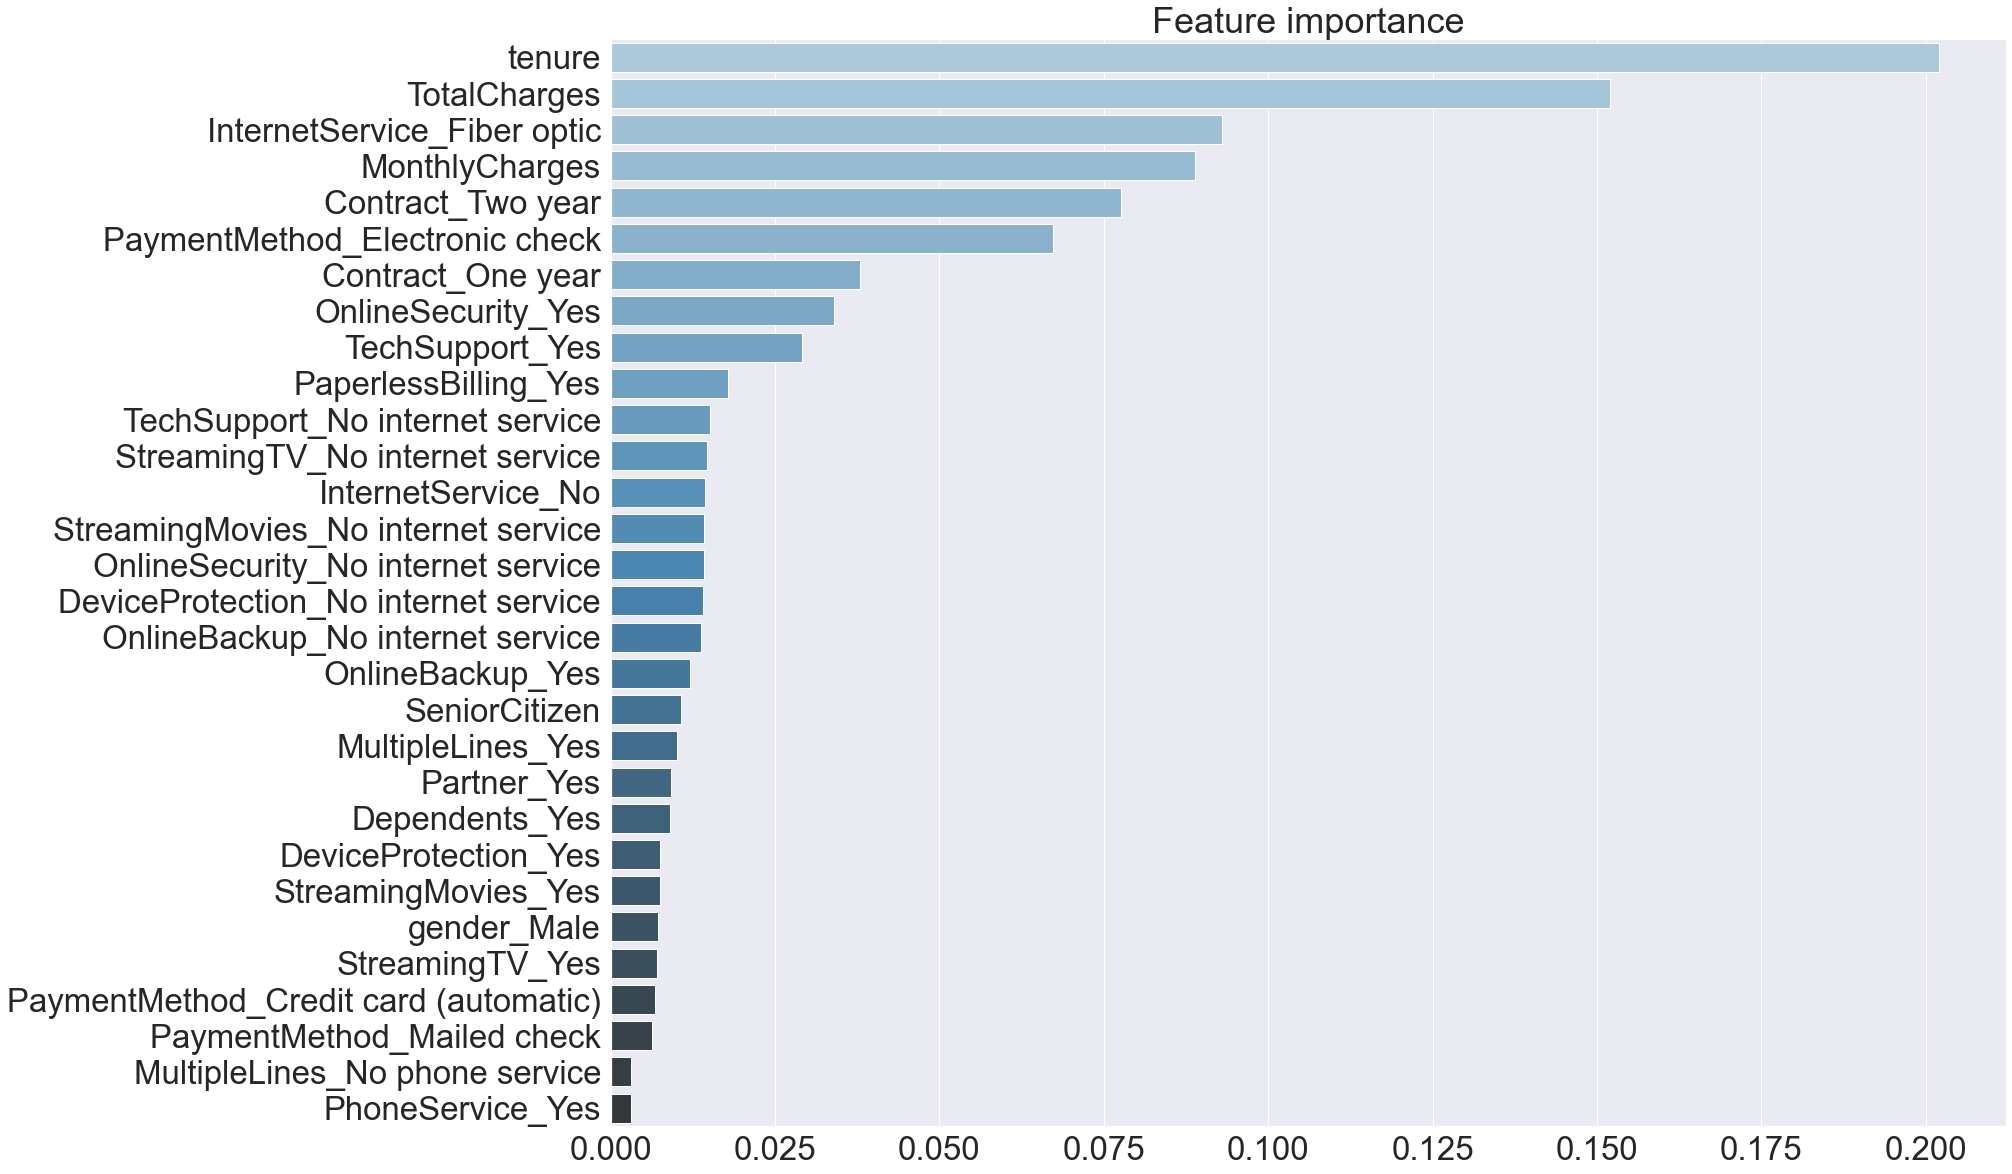

In [279]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(25,20))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

# E. Building our model

In [281]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [282]:
clf_forest = GradientBoostingClassifier()
clf_forest.fit(X_train, y_train)

GradientBoostingClassifier()

In [111]:
# Model prediction on training dataset

In [283]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8266666666666667

In [284]:
 # Model prediction in testing dataset

In [285]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.7896233120113717

In [286]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted = pred_test

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)


Confusion matrix : 
 [[179 195]
 [101 932]]
Outcome values : 
 179 195 101 932
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.48      0.55       374
           0       0.83      0.90      0.86      1033

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [289]:
# imbalanced dataset
y.value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

# The problem with the above model is that it uses an imbalanced class dataset, which we see in the cell above, to solve this, let's use an oversampling technique and re-run our model.

# Oversampling technique
Synthetic Minority Oversampling Technique(SMOTE) is an oversampling technique and widely used to handle the imbalanced dataset.
This technique synthesizes new data points for minority class and oversample that class.

In [287]:
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

In [288]:
y_resampled.value_counts()


0    5163
1    5163
Name: Churn_Yes, dtype: int64

# Balanced class dataset is ready!

# Train Test Splits

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)

# Model - GradientBoostingClassifier

In [291]:
clf_forest = GradientBoostingClassifier()
clf_forest.fit(X_train, y_train)

GradientBoostingClassifier()

In [293]:
# Model prediction on training dataset

In [294]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8491525423728814

In [295]:
# Model prediction in testing dataset

In [296]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8272023233301065

# Confusion Matrix

In [102]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted = pred_test

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)


Confusion matrix : 
 [[880 149]
 [208 829]]
Outcome values : 
 880 149 208 829
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.86      0.83      1029
           0       0.85      0.80      0.82      1037

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



# F. Final remarks

# From the above two confusion matrices(before and after balancing the dataset), it is clear that<br>
# 1. The train score improved by a small margin of 2%<br>
# 2. The test score improved by a margin of 4%<br>
# 3. However there is a huge difference in precision and recall values for class'1' of 17% and 38% respectively.<br>

# We can further improve the accuracy by considering only the features with higher correlation and also try different models.